In [32]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from geopy.distance import geodesic


# Load the merged dataset
df = pd.read_csv('data/merged_dataset.csv')
from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [33]:
df = pd.read_csv("data/merged_dataset.csv")
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,map_id,AirportCode,AirportName,Latitude,Longitude
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,98178,47.511,-122.257,1340,5650,"47.5112, -122.257",NaN,NaN,NaN,NaN
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,98125,47.721,-122.319,1690,7639,"47.721, -122.319",NaN,NaN,NaN,NaN
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,98028,47.738,-122.233,2720,8062,"47.7379, -122.233",NaN,NaN,NaN,NaN
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,98136,47.521,-122.393,1360,5000,"47.5208, -122.393",NaN,NaN,NaN,NaN
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,98074,47.617,-122.045,1800,7503,"47.6168, -122.045",NaN,NaN,NaN,NaN


How many houses does he sells in center and outskirt?

In [34]:
center_latitude_threshold = df['lat'].mean()
center_latitude_threshold

47.56009299439737

In [35]:
# Define a latitude threshold to distinguish between center and outskirts
center_latitude_threshold = 47.6

# Create a new column 'location' based on latitude
df['location'] = np.where(df['lat'] >= center_latitude_threshold, 'center', 'outskirts')

# Count the number of houses in each category
location_counts = df['location'].value_counts()

# Display the results
print("Number of houses in the center:", location_counts['center'])
print("Number of houses in the outskirts:", location_counts['outskirts'])


Number of houses in the center: 9468
Number of houses in the outskirts: 12129


Correlation Matrix:
               sqft_living15  price
sqft_living15          1.000  0.585
price                  0.585  1.000


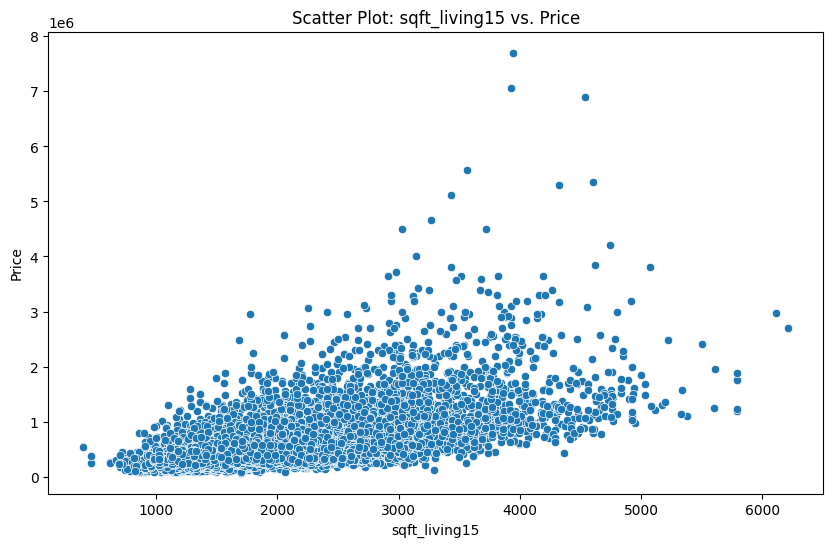

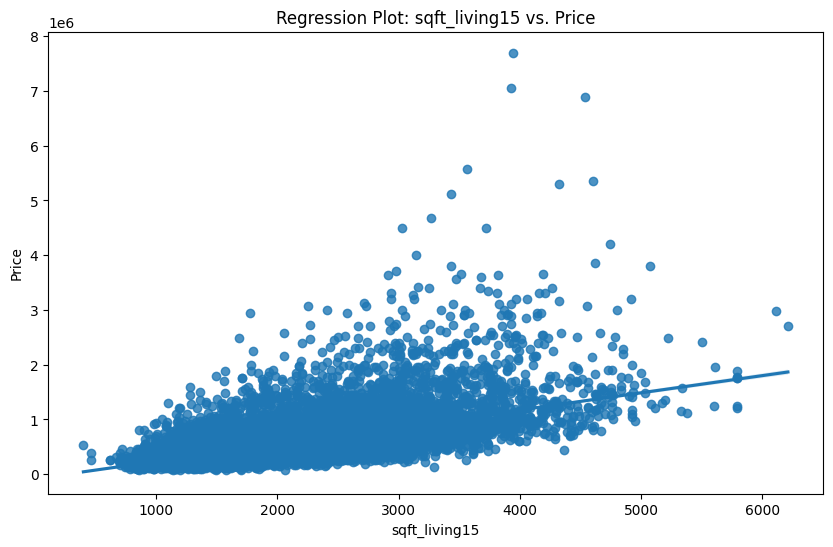

In [36]:

# Correlation Analysis
correlation = df[['sqft_living15', 'price']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation)

# Visualization: Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living15', y='price', data=df)
plt.title('Scatter Plot: sqft_living15 vs. Price')
plt.xlabel('sqft_living15')
plt.ylabel('Price')
plt.show()

# Visualization: Regression Plot
plt.figure(figsize=(10, 6))
sns.regplot(x='sqft_living15', y='price', data=df)
plt.title('Regression Plot: sqft_living15 vs. Price')
plt.xlabel('sqft_living15')
plt.ylabel('Price')
plt.show()


In [37]:
# Filter data for houses with waterfront
waterfront_houses = df[df['waterfront'] == 1]

# Select the top 10% of real estate with waterfront based on 'price'
top_10_percent_waterfront = waterfront_houses.nlargest(int(0.10 * len(waterfront_houses)), 'price')

# Display the top 10% of real estate with waterfront
print("Top 10% of real estate with waterfront:")
print(top_10_percent_waterfront)

Top 10% of real estate with waterfront:
               id        date       price  bedrooms  bathrooms  sqft_living  \
3910   9808700762   6/11/2014 7060000.000         5      4.500        10040   
1313   7558700030   4/13/2015 5300000.000         6      6.000         7390   
1162   1247600105  10/20/2014 5110000.000         5      5.250         8010   
8085   1924059029   6/17/2014 4670000.000         5      6.750         9640   
2624   7738500731   8/15/2014 4500000.000         5      5.500         6640   
2083   8106100105  11/14/2014 3850000.000         4      4.250         5770   
6502   4217402115   4/21/2015 3650000.000         6      4.750         5480   
15241  2425049063   9/11/2014 3640000.000         4      3.250         4830   
2862   4114601570  11/18/2014 3600000.000         3      3.250         5020   
21560  9253900271    1/7/2015 3570000.000         5      4.500         4850   
7982   9362000040   6/23/2014 3400000.000         3      4.500         5230   
13954  31260

In [38]:
# Assume you want to exclude the top and bottom 20% of prices
price_threshold_low = df['price'].quantile(0.2)
price_threshold_high = df['price'].quantile(0.8)

# Filter data for houses outside the center 
houses_outside_center = df[df['location'] == 'outskirts']

# Filter middle-rate houses outside the center
middle_rate_houses_outside_center = houses_outside_center[
    (houses_outside_center['price'] > price_threshold_low) &
    (houses_outside_center['price'] < price_threshold_high)
]

# Display the middle-rate houses outside the center
print("Middle-rate houses outside the center:")
print(middle_rate_houses_outside_center)

Middle-rate houses outside the center:
               id        date      price  bedrooms  bathrooms  sqft_living  \
3      2487200875   12/9/2014 604000.000         4      3.000         1960   
9      3793500160   3/12/2015 323000.000         3      2.500         1890   
15     9297300055   1/24/2015 650000.000         4      3.000         2950   
24     3814700200  11/20/2014 329000.000         3      2.250         2450   
30     8562750320  11/10/2014 580500.000         3      2.500         2320   
...           ...         ...        ...       ...        ...          ...   
21591  2997800021   2/19/2015 475000.000         3      2.500         1310   
21593  6600060120   2/23/2015 400000.000         4      2.500         2310   
21594  1523300141   6/23/2014 402101.000         2      0.750         1020   
21595   291310100   1/16/2015 400000.000         3      2.500         1600   
21596  1523300157  10/15/2014 325000.000         2      0.750         1020   

       sqft_lot  floors 

In [39]:
# Sort the dataset by price in ascending order to find the cheapest houses
cheapest_houses = df.sort_values(by='price', ascending=True).head(10)

# Sort the dataset by date in ascending order to find the fastest-to-buy houses
fastest_to_buy_houses = df.sort_values(by='date', ascending=True).head(10)

# Display the cheapest and fastest-to-buy houses
print("Cheapest house:")
print(cheapest_houses)

print("\nFastest-to-buy house:")
print(fastest_to_buy_houses)


Cheapest house:
               id       date     price  bedrooms  bathrooms  sqft_living  \
15279    40000362   5/6/2014 78000.000         2      1.000          780   
465    8658300340  5/23/2014 80000.000         1      0.750          430   
16184  3028200080  3/24/2015 81000.000         2      1.000          730   
8267   3883800011  11/5/2014 82000.000         3      1.000          860   
2139   1623049041   5/8/2014 82500.000         2      1.000          520   
18453  7999600180  5/29/2014 83000.000         2      1.000          900   
3763   1523049188  4/30/2015 84000.000         2      1.000          700   
10242  2422049104  9/15/2014 85000.000         2      1.000          830   
16700  1322049150   3/5/2015 85000.000         2      1.000          910   
13743  1788900230  7/22/2014 86500.000         3      1.000          840   

       sqft_lot  floors  waterfront  view  ...    lat     long  sqft_living15  \
15279     16344   1.000       0.000 0.000  ... 47.474 -122.280    

In [40]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,map_id,AirportCode,AirportName,Latitude,Longitude,location
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,47.511,-122.257,1340,5650,"47.5112, -122.257",NaN,NaN,NaN,NaN,outskirts
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,47.721,-122.319,1690,7639,"47.721, -122.319",NaN,NaN,NaN,NaN,center
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,47.738,-122.233,2720,8062,"47.7379, -122.233",NaN,NaN,NaN,NaN,center
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,47.521,-122.393,1360,5000,"47.5208, -122.393",NaN,NaN,NaN,NaN,outskirts
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,47.617,-122.045,1800,7503,"47.6168, -122.045",NaN,NaN,NaN,NaN,center


In [70]:
min_date = df['date'].min()
max_date = df['date'].max()
print(f"Time Span: {min_date} to {max_date}")


Time Span: 2014-05-02 00:00:00 to 2015-05-27 00:00:00


In [71]:
min_lat = df['lat'].min()
max_lat = df['lat'].max()
min_long = df['long'].min()
max_long = df['long'].max()
print(f"Latitude Range: {min_lat} to {max_lat}")
print(f"Longitude Range: {min_long} to {max_long}")


Latitude Range: 47.1559 to 47.7776
Longitude Range: -122.519 to -121.315


In [72]:
num_rows, num_columns = df.shape
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")


Number of Rows: 21597
Number of Columns: 30


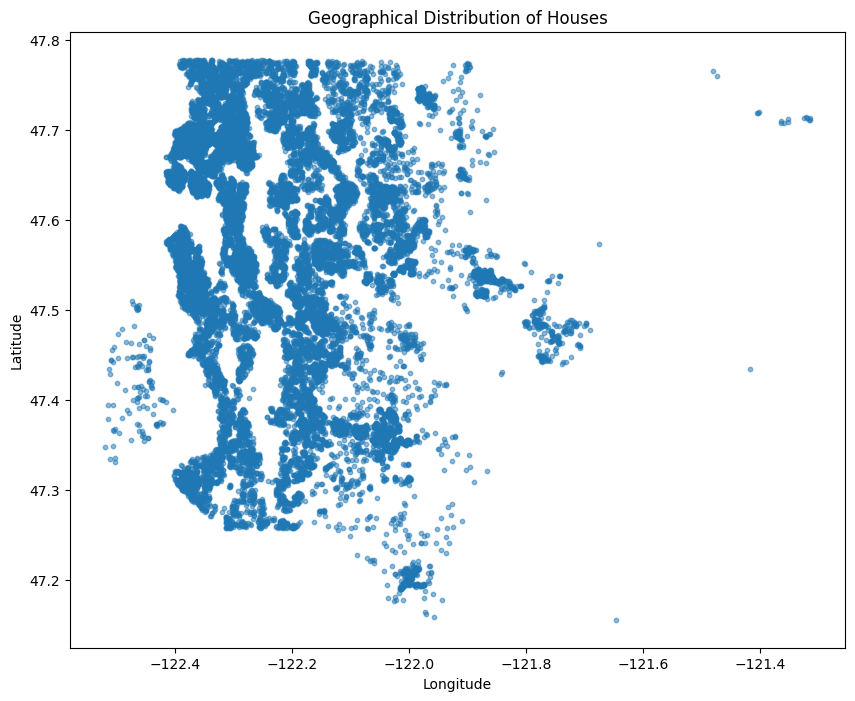

In [73]:
# Plotting the geographical distribution of houses
plt.figure(figsize=(10, 8))
plt.scatter(df['long'], df['lat'], s=10, alpha=0.5)
plt.title('Geographical Distribution of Houses')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


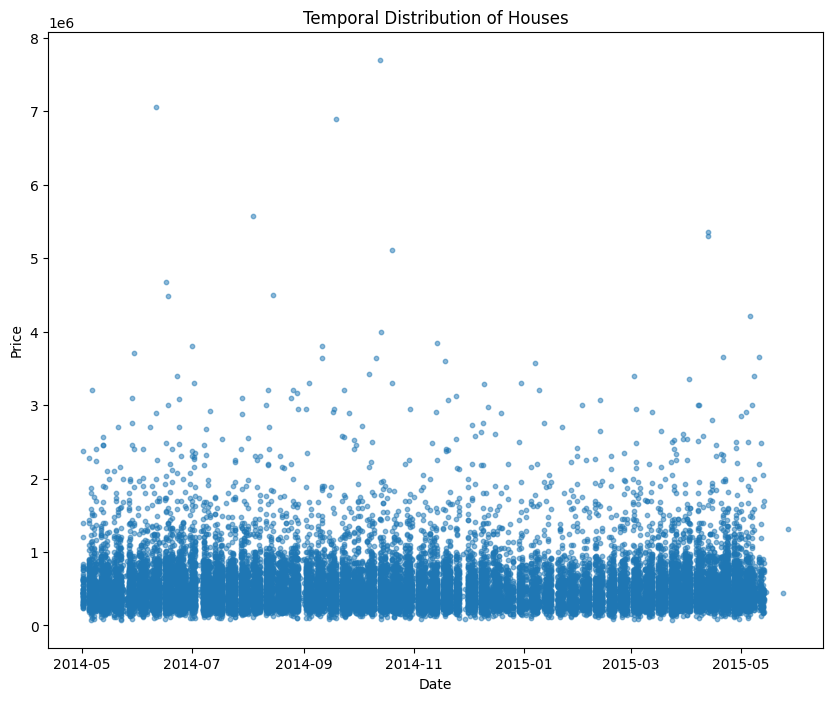

In [74]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Plotting the temporal distribution of houses
plt.figure(figsize=(10, 8))
plt.scatter(df['date'], df['price'], s=10, alpha=0.5)
plt.title('Temporal Distribution of Houses')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


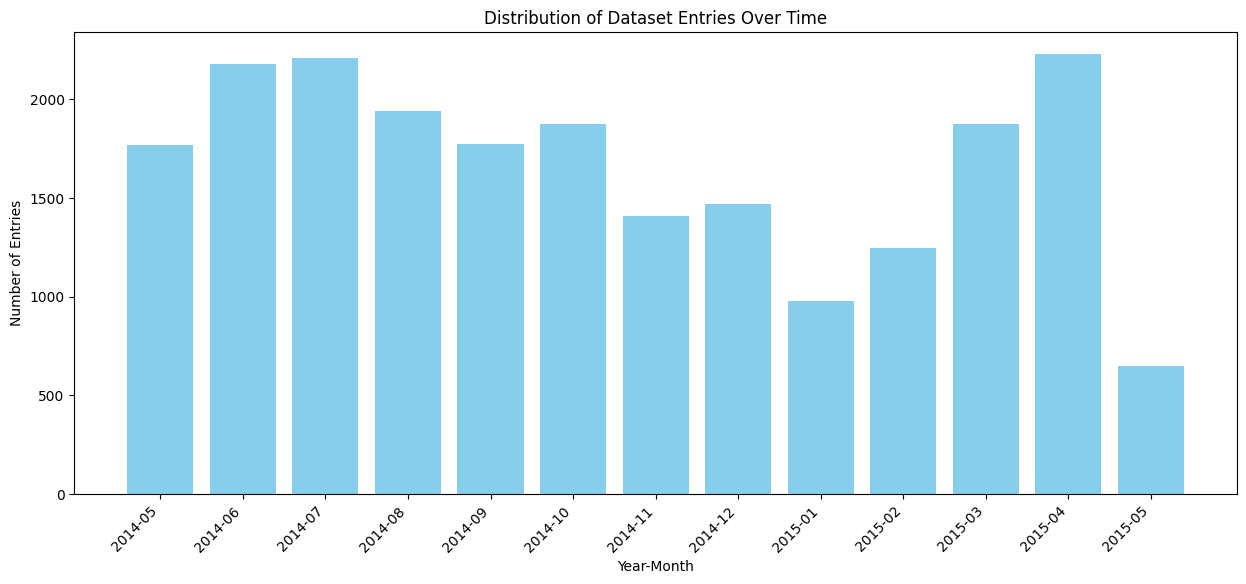

In [77]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the year and month from 'date'
df['year_month'] = df['date'].dt.to_period('M')

# Group by year and month, count the number of entries, and reset the index
monthly_counts = df.groupby('year_month').size().reset_index(name='count')

# Plotting
plt.figure(figsize=(15, 6))
plt.bar(monthly_counts['year_month'].astype(str), monthly_counts['count'], color='skyblue')
plt.xlabel('Year-Month')
plt.ylabel('Number of Entries')
plt.title('Distribution of Dataset Entries Over Time')
plt.xticks(rotation=45, ha='right')
plt.show()


1. General Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   21597 non-null  int64         
 1   date                 21597 non-null  datetime64[ns]
 2   price                21597 non-null  float64       
 3   bedrooms             21597 non-null  int64         
 4   bathrooms            21597 non-null  float64       
 5   sqft_living          21597 non-null  int64         
 6   sqft_lot             21597 non-null  int64         
 7   floors               21597 non-null  float64       
 8   waterfront           19221 non-null  float64       
 9   view                 21534 non-null  float64       
 10  condition            21597 non-null  int64         
 11  grade                21597 non-null  int64         
 12  sqft_above           21597 non-null  int64         
 13  sqft_ba

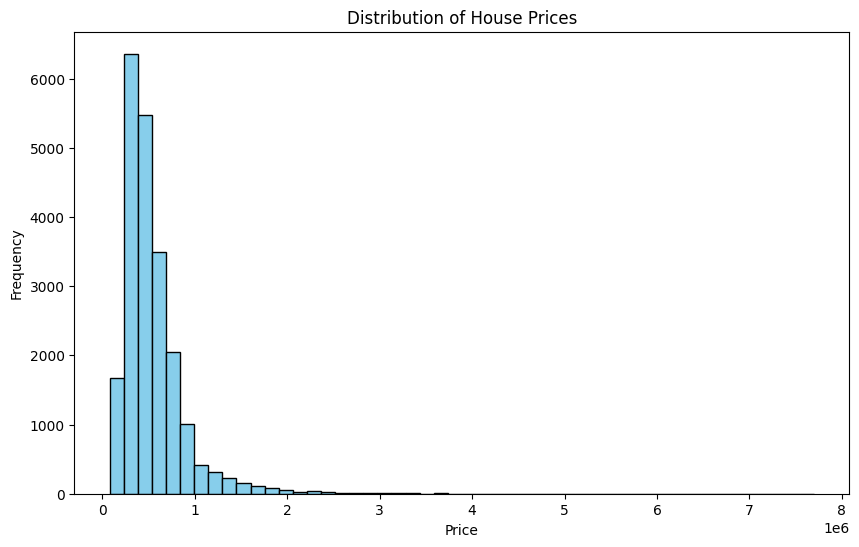

In [79]:
# 1. General Information
print("1. General Information:")
print(df.info())

# 2. Descriptive Statistics
print("\n2. Descriptive Statistics:")
print(df.describe(include='all'))

# 3. Missing Values
print("\n3. Missing Values:")
print(df.isnull().sum())

# 4. Data Distribution 

plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


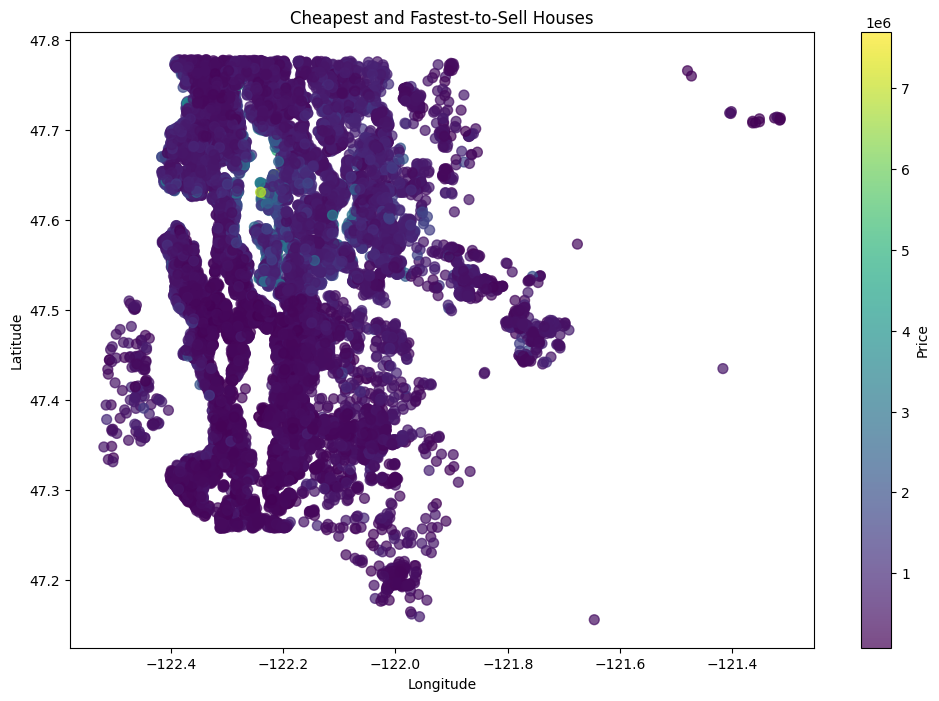

In [41]:
# Select relevant columns (ID, lat, long, price, date)
location_price_df = df[['id', 'lat', 'long', 'price', 'date']]

# Drop rows with missing latitude, longitude, or price values
location_price_df = location_price_df.dropna(subset=['lat', 'long', 'price'])

# Sort by date to find the fastest-to-sell houses
location_price_df = location_price_df.sort_values(by='date')

# Create a scatter plot with color-coded points based on price
plt.figure(figsize=(12, 8))
scatter = plt.scatter(location_price_df['long'], location_price_df['lat'], c=location_price_df['price'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(scatter, label='Price')
plt.title('Cheapest and Fastest-to-Sell Houses')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display the plot
plt.show()


In [42]:
df.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'map_id', 'AirportCode',
       'AirportName', 'Latitude', 'Longitude', 'location'],
      dtype='object')

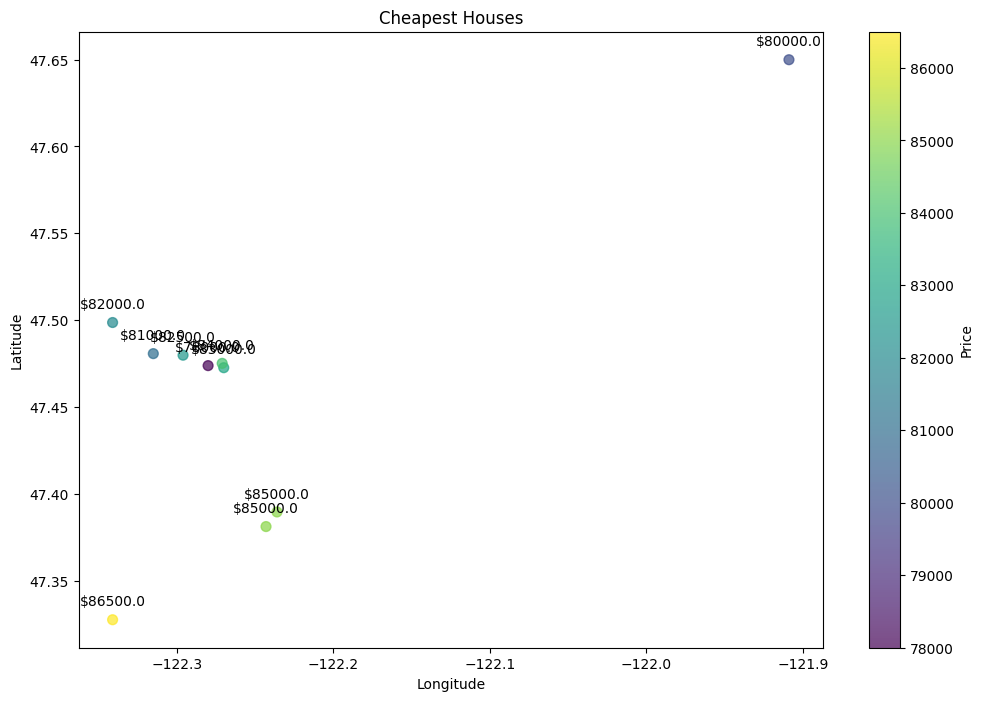

In [43]:

# Select relevant columns (lat, long, price)
location_price_df = df[['lat', 'long', 'price']]

# Drop rows with missing latitude, longitude, or price values
location_price_df = location_price_df.dropna(subset=['lat', 'long', 'price'])

# Select the cheapest houses
cheapest_houses = location_price_df.nsmallest(10, 'price')  # You can adjust the number as needed

# Create a scatter plot for the cheapest houses
plt.figure(figsize=(12, 8))
scatter = plt.scatter(cheapest_houses['long'], cheapest_houses['lat'], c=cheapest_houses['price'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(scatter, label='Price')
plt.title('Cheapest Houses')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Annotate each house with its price
for index, house in cheapest_houses.iterrows():
    plt.annotate(f"${house['price']}", (house['long'], house['lat']), textcoords="offset points", xytext=(0,10), ha='center')

# Display the plot
plt.show()


In [44]:

# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the year and month from 'date'
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Group by year and month, calculate mean, max, and min sales
monthly_sales_stats = df.groupby(['year', 'month'])['price'].agg(['mean', 'max', 'min']).reset_index()

# Combine year and month into a new column 'year_month' for better reference
monthly_sales_stats['year_month'] = monthly_sales_stats['year'].astype(str) + '-' + monthly_sales_stats['month'].astype(str)

# Display the resulting DataFrame
print(monthly_sales_stats)


    year  month       mean         max        min year_month
0   2014      5 548166.600 3710000.000  78000.000     2014-5
1   2014      6 557534.318 7060000.000  92000.000     2014-6
2   2014      7 544892.161 3800000.000  86500.000     2014-7
3   2014      8 536655.212 5570000.000 107000.000     2014-8
4   2014      9 529723.518 6890000.000  85000.000     2014-9
5   2014     10 539439.447 7700000.000  89000.000    2014-10
6   2014     11 522359.903 3850000.000  82000.000    2014-11
7   2014     12 524799.902 3300000.000  95000.000    2014-12
8   2015      1 525963.252 3570000.000  99000.000     2015-1
9   2015      2 508520.051 3070000.000  89950.000     2015-2
10  2015      3 544057.683 3400000.000  81000.000     2015-3
11  2015      4 562215.615 5350000.000  84000.000     2015-4
12  2015      5 558193.096 4210000.000  95000.000     2015-5


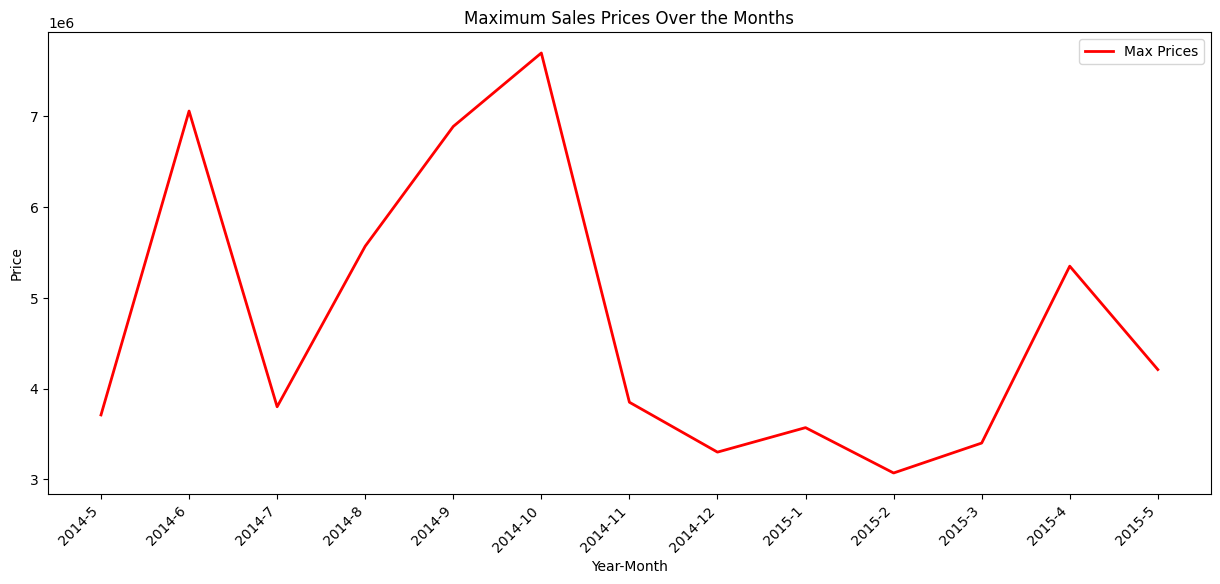

In [45]:


# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the year and month from 'date'
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Group by year and month, calculate max prices and corresponding zip codes
monthly_max_prices = df.groupby(['year', 'month'])[['price', 'zipcode']].agg({'price': 'max', 'zipcode': 'first'}).reset_index()

# Combine year and month into a new column 'year_month' for better plotting
monthly_max_prices['year_month'] = monthly_max_prices['year'].astype(str) + '-' + monthly_max_prices['month'].astype(str)

# Plotting
plt.figure(figsize=(15, 6))

# Line plot for max prices
plt.plot(monthly_max_prices['year_month'], monthly_max_prices['price'], color='red', linewidth=2, label='Max Prices')


# Adding labels and title
plt.xlabel('Year-Month')
plt.ylabel('Price')
plt.title('Maximum Sales Prices Over the Months')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()

# Display the plot
plt.show()


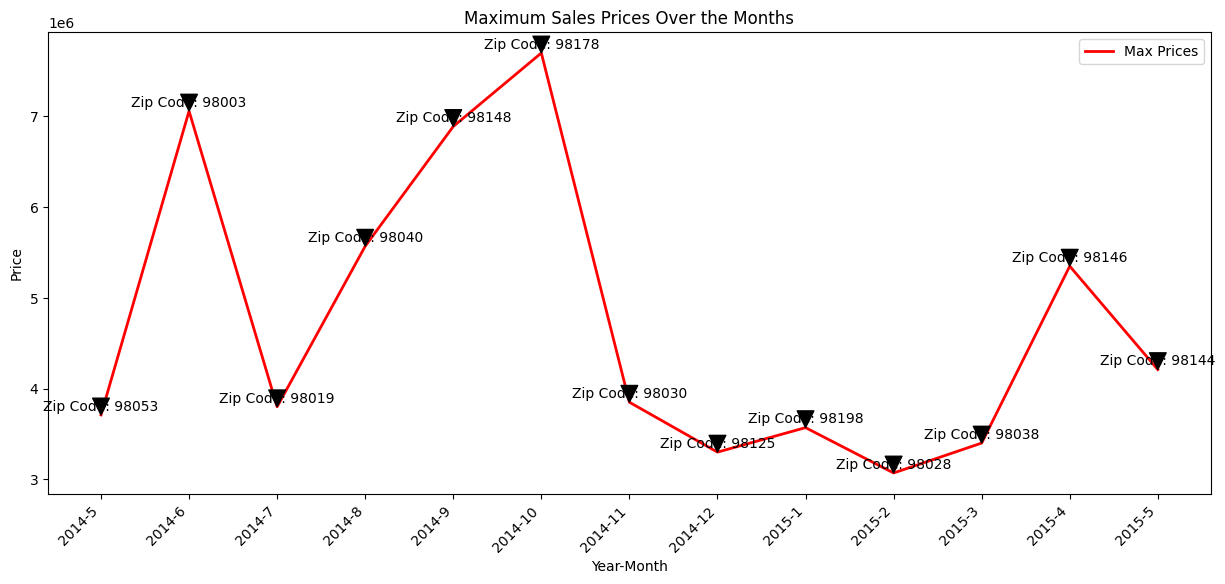

In [46]:


# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the year and month from 'date'
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Group by year and month, calculate max prices and corresponding zip codes
monthly_max_prices = df.groupby(['year', 'month'])[['price', 'zipcode']].agg({'price': 'max', 'zipcode': 'first'}).reset_index()

# Combine year and month into a new column 'year_month' for better plotting
monthly_max_prices['year_month'] = monthly_max_prices['year'].astype(str) + '-' + monthly_max_prices['month'].astype(str)

# Plotting
plt.figure(figsize=(15, 6))

# Line plot for max prices
plt.plot(monthly_max_prices['year_month'], monthly_max_prices['price'], color='red', linewidth=2, label='Max Prices')

# Annotate all points with zip codes
for idx, row in monthly_max_prices.iterrows():
    plt.annotate(f'Zip Code: {row["zipcode"]}', 
                 xy=(row['year_month'], row['price']), 
                 xytext=(row['year_month'], row['price'] + 50000),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 ha='center')

# Adding labels and title
plt.xlabel('Year-Month')
plt.ylabel('Price')
plt.title('Maximum Sales Prices Over the Months')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()

# Display the plot
plt.show()


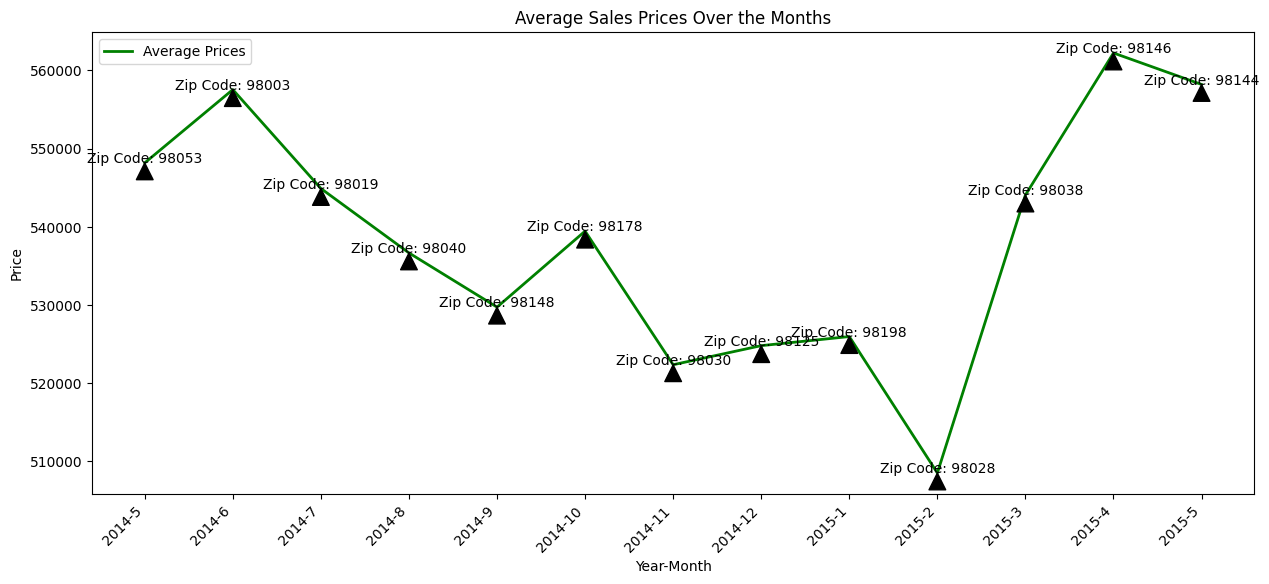

In [47]:

# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the year and month from 'date'
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Group by year and month, calculate mean prices and corresponding zip codes
monthly_mean_prices = df.groupby(['year', 'month'])[['price', 'zipcode']].agg({'price': 'mean', 'zipcode': 'first'}).reset_index()

# Combine year and month into a new column 'year_month' for better plotting
monthly_mean_prices['year_month'] = monthly_mean_prices['year'].astype(str) + '-' + monthly_mean_prices['month'].astype(str)

# Plotting
plt.figure(figsize=(15, 6))

# Line plot for mean prices
plt.plot(monthly_mean_prices['year_month'], monthly_mean_prices['price'], color='green', linewidth=2, label='Average Prices')

# Annotate all points with zip codes
for idx, row in monthly_mean_prices.iterrows():
    plt.annotate(f'Zip Code: {row["zipcode"]}', 
                 xy=(row['year_month'], row['price']), 
                 xytext=(row['year_month'], row['price'] ),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 ha='center')

# Adding labels and title
plt.xlabel('Year-Month')
plt.ylabel('Price')
plt.title('Average Sales Prices Over the Months')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()

# Display the plot
plt.show()


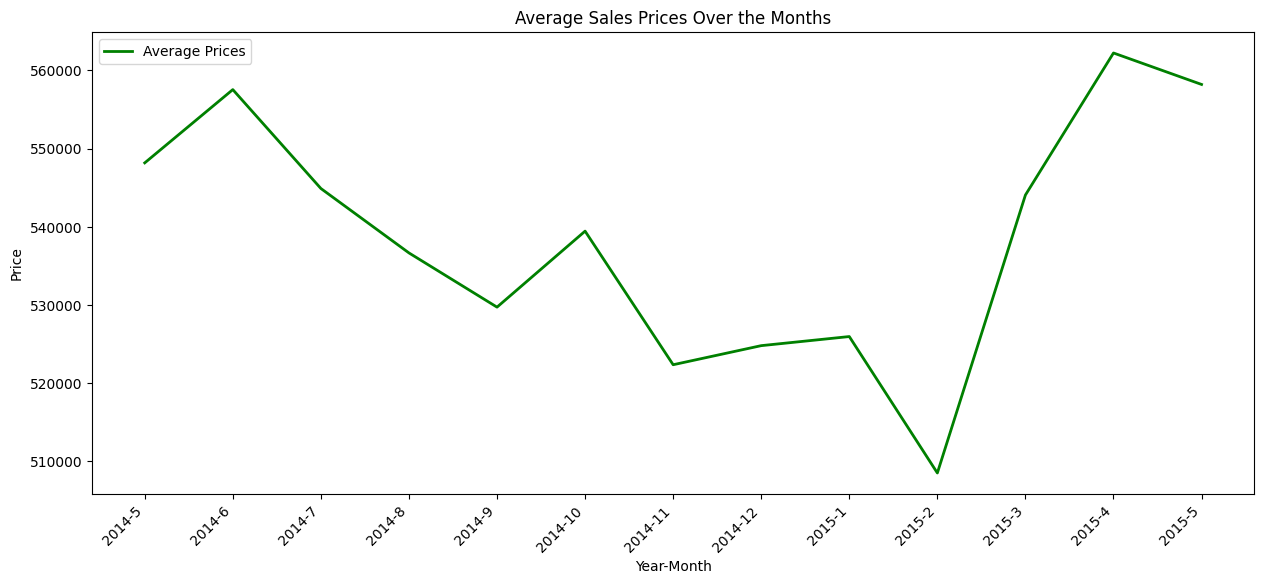

In [48]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the year and month from 'date'
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Group by year and month, calculate mean prices and corresponding zip codes
monthly_mean_prices = df.groupby(['year', 'month'])[['price', 'zipcode']].agg({'price': 'mean', 'zipcode': 'first'}).reset_index()

# Combine year and month into a new column 'year_month' for better plotting
monthly_mean_prices['year_month'] = monthly_mean_prices['year'].astype(str) + '-' + monthly_mean_prices['month'].astype(str)

# Plotting
plt.figure(figsize=(15, 6))

# Line plot for mean prices
plt.plot(monthly_mean_prices['year_month'], monthly_mean_prices['price'], color='green', linewidth=2, label='Average Prices')

# Adding labels and title
plt.xlabel('Year-Month')
plt.ylabel('Price')
plt.title('Average Sales Prices Over the Months')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()

# Display the plot
plt.show()


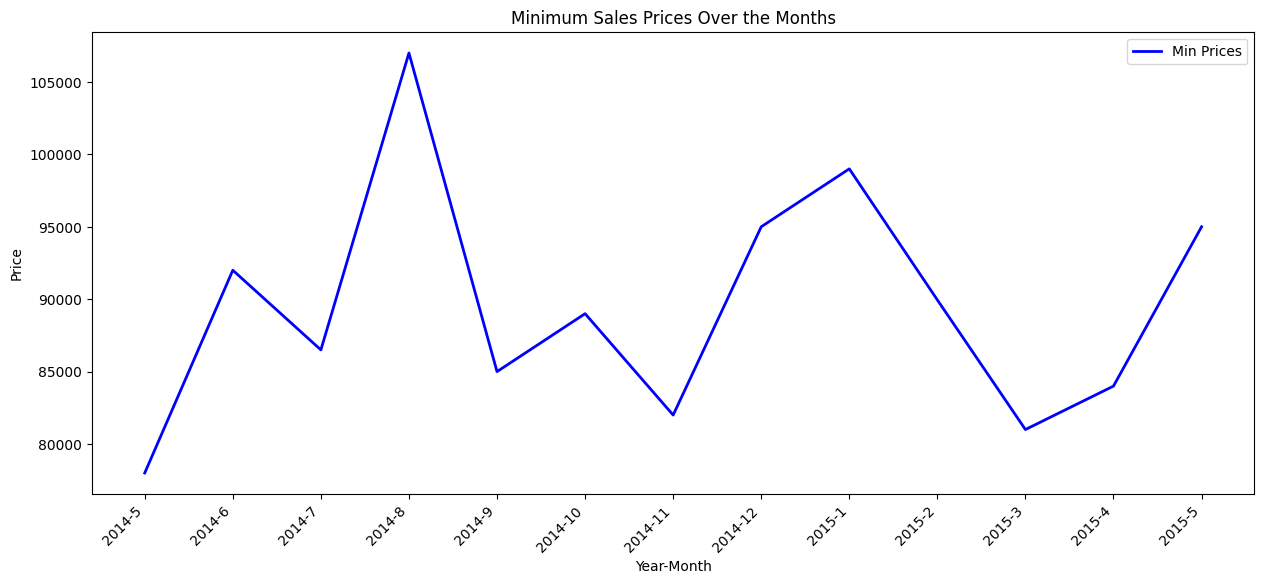

In [49]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the year and month from 'date'
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Group by year and month, calculate min prices
monthly_min_prices = df.groupby(['year', 'month'])['price'].min().reset_index()

# Combine year and month into a new column 'year_month' for better plotting
monthly_min_prices['year_month'] = monthly_min_prices['year'].astype(str) + '-' + monthly_min_prices['month'].astype(str)

# Plotting
plt.figure(figsize=(15, 6))

# Line plot for min prices
plt.plot(monthly_min_prices['year_month'], monthly_min_prices['price'], color='blue', linewidth=2, label='Min Prices')

# Adding labels and title
plt.xlabel('Year-Month')
plt.ylabel('Price')
plt.title('Minimum Sales Prices Over the Months')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()

# Display the plot
plt.show()


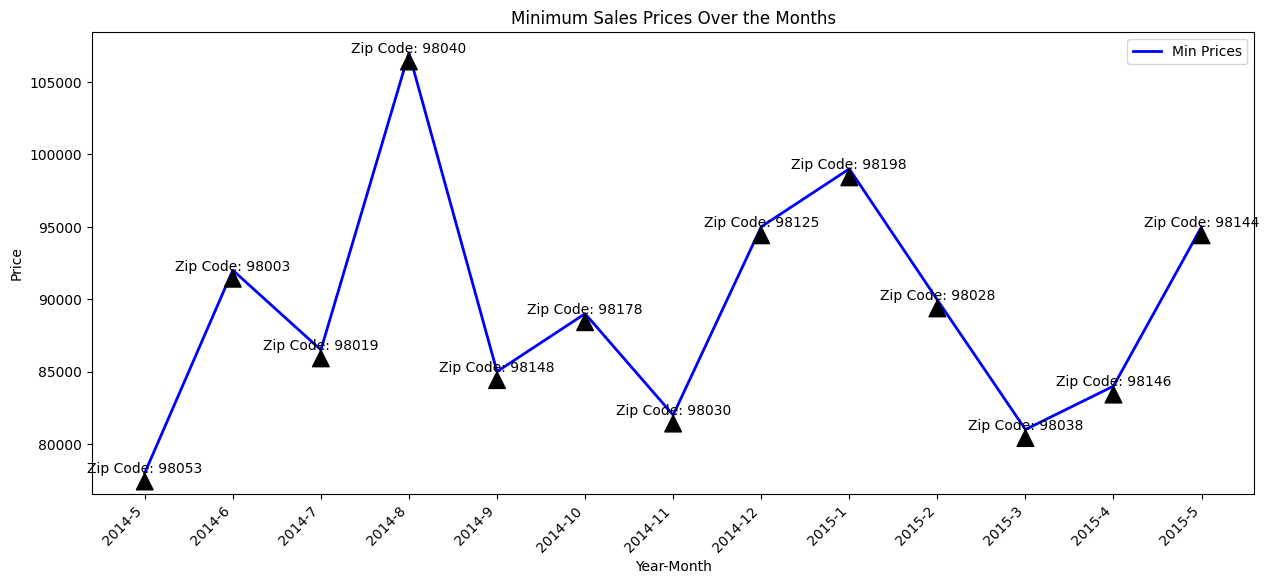

In [50]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the year and month from 'date'
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Group by year and month, calculate min prices and corresponding zip codes
monthly_min_prices = df.groupby(['year', 'month'])[['price', 'zipcode']].agg({'price': 'min', 'zipcode': 'first'}).reset_index()

# Combine year and month into a new column 'year_month' for better plotting
monthly_min_prices['year_month'] = monthly_min_prices['year'].astype(str) + '-' + monthly_min_prices['month'].astype(str)

# Plotting
plt.figure(figsize=(15, 6))

# Line plot for min prices
plt.plot(monthly_min_prices['year_month'], monthly_min_prices['price'], color='blue', linewidth=2, label='Min Prices')

# Annotate all points with zip codes
for idx, row in monthly_min_prices.iterrows():
    plt.annotate(f'Zip Code: {row["zipcode"]}', 
                 xy=(row['year_month'], row['price']), 
                 xytext=(row['year_month'], row['price'] ),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 ha='center')

# Adding labels and title
plt.xlabel('Year-Month')
plt.ylabel('Price')
plt.title('Minimum Sales Prices Over the Months')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()

# Display the plot
plt.show()



Analyzing the three plots (min, max, and mean sales prices over the months), we can draw the following conclusions:

Mean Prices Over the Months (Green Line):
Represents the average (mean) sales prices for each month.
Shows a general trend of how the average house prices fluctuate over time.
Provides an overall view of the market's pricing dynamics.

Min Prices Over the Months (Blue Line):
Represents the minimum sales prices for each month.
Highlights the lowest prices observed in the market during each month.
Useful for identifying periods with more affordable housing options.

Max Prices Over the Months (Red Line):
Represents the maximum sales prices for each month.
Indicates the highest prices reached in the market during each month.
Useful for identifying periods of high demand or luxury market trends.

In [51]:
# Filter the DataFrame based on the condition (grades between 6 and 8)
filtered_df = df[(df['grade'] >= 6) & (df['grade'] <= 8)]

# Get unique zip codes
zipcodes_between_6_and_8 = filtered_df['zipcode'].unique()

# Display the zip codes
print("Zip Codes with Grades Between 6 and 8:")
print(zipcodes_between_6_and_8)


Zip Codes with Grades Between 6 and 8:
[98178 98125 98028 98136 98074 98003 98198 98146 98038 98007 98115 98107
 98019 98103 98002 98133 98092 98030 98119 98112 98052 98027 98117 98058
 98001 98056 98166 98023 98148 98105 98042 98008 98059 98122 98144 98004
 98034 98116 98118 98040 98032 98077 98108 98168 98177 98065 98029 98006
 98109 98022 98126 98155 98024 98011 98053 98031 98010 98106 98045 98199
 98072 98188 98070 98033 98075 98055 98005 98014 98102 98039]


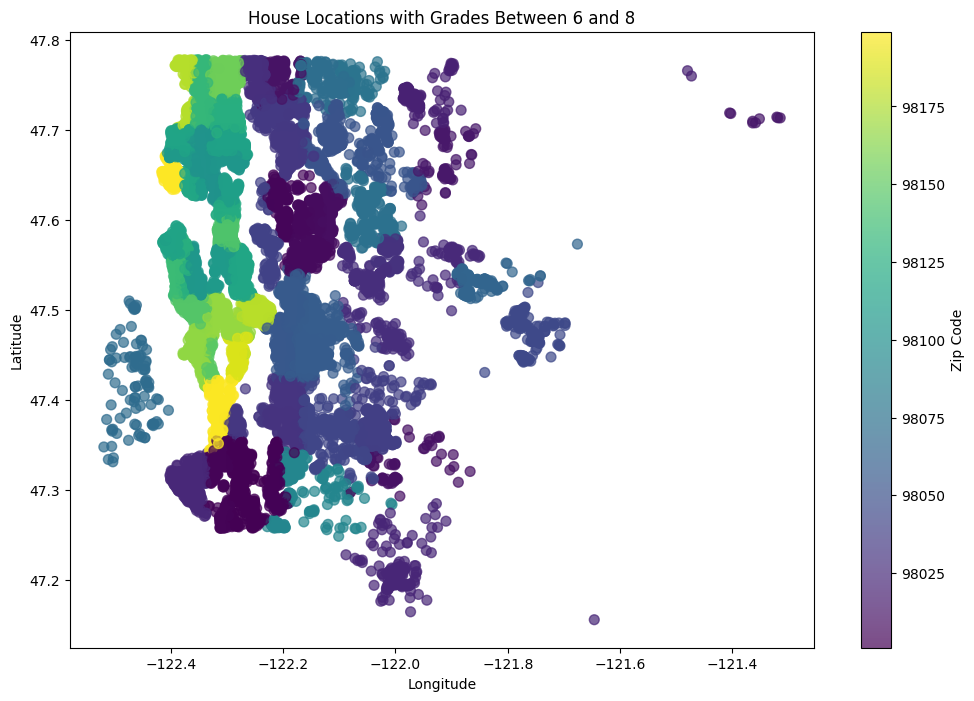

In [52]:
# Filter the DataFrame based on the condition (grades between 6 and 8)
filtered_df = df[(df['grade'] >= 6) & (df['grade'] <= 8)]

# Select relevant columns (lat, long, zipcode)
location_zipcode_df = filtered_df[['lat', 'long', 'zipcode']]

# Drop rows with missing latitude, longitude, or zipcode values
location_zipcode_df = location_zipcode_df.dropna(subset=['lat', 'long', 'zipcode'])

# Create a scatter plot for house locations with grades between 6 and 8
plt.figure(figsize=(12, 8))
scatter = plt.scatter(location_zipcode_df['long'], location_zipcode_df['lat'], c=location_zipcode_df['zipcode'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(scatter, label='Zip Code')
plt.title('House Locations with Grades Between 6 and 8')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display the plot
plt.show()


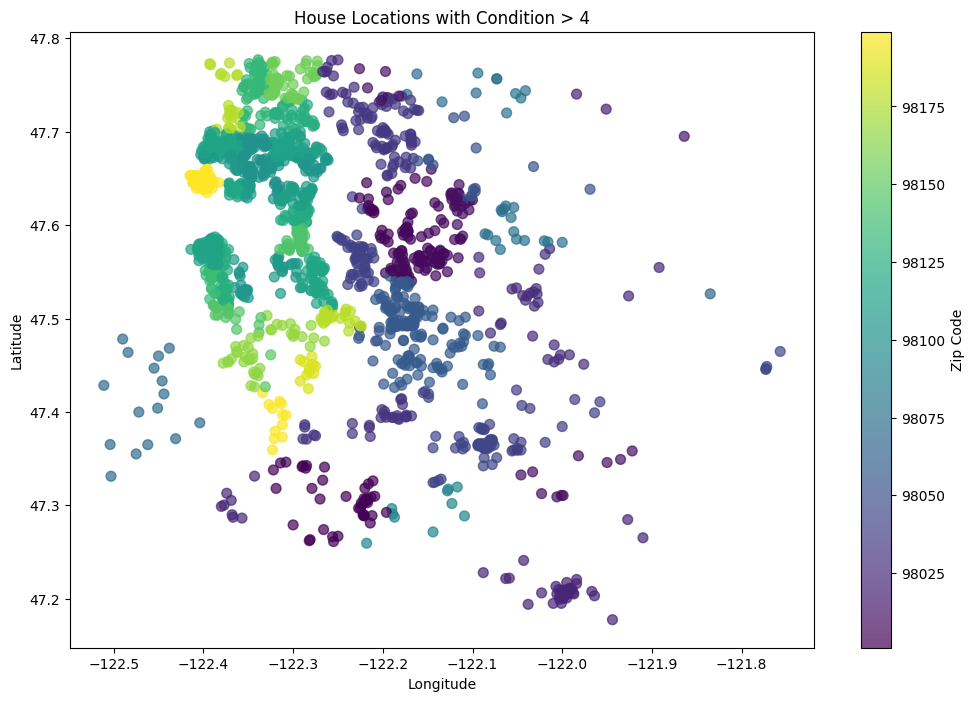

In [53]:
# Filter the DataFrame based on the condition
filtered_df = df[df['condition'] > 4]

# Select relevant columns (lat, long, zipcode)
location_zipcode_df = filtered_df[['lat', 'long', 'zipcode']]

# Drop rows with missing latitude, longitude, or zipcode values
location_zipcode_df = location_zipcode_df.dropna(subset=['lat', 'long', 'zipcode'])

# Create a scatter plot for house locations with conditions > 4
plt.figure(figsize=(12, 8))
scatter = plt.scatter(location_zipcode_df['long'], location_zipcode_df['lat'], c=location_zipcode_df['zipcode'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(scatter, label='Zip Code')
plt.title('House Locations with Condition > 4')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display the plot
plt.show()


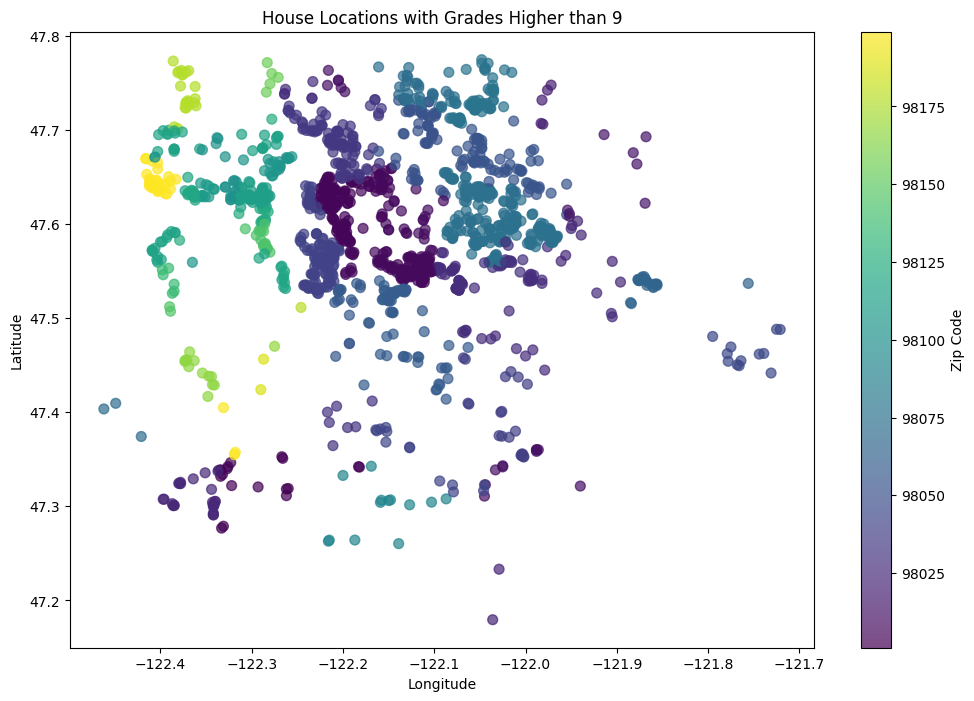

In [85]:
# Filter the DataFrame based on the condition (grades higher than 9)
filtered_df = df[df['grade'] > 9]

# Select relevant columns (lat, long, zipcode)
location_zipcode_df = filtered_df[['lat', 'long', 'zipcode']]

# Drop rows with missing latitude, longitude, or zipcode values
location_zipcode_df = location_zipcode_df.dropna(subset=['lat', 'long', 'zipcode'])

# Create a scatter plot for house locations with grades higher than 9
plt.figure(figsize=(12, 8))
scatter = plt.scatter(location_zipcode_df['long'], location_zipcode_df['lat'], c=location_zipcode_df['zipcode'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(scatter, label='Zip Code')
plt.title('House Locations with Grades Higher than 9')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display the plot
plt.show()


In [86]:
# Filter the DataFrame based on the condition (grades higher than 9)
high_grade_zipcodes = df[df['grade'] > 9]['zipcode'].unique()

# Display the unique zip codes with grades higher than 9
print("Zip Codes with Grades Higher than 9:")
print(high_grade_zipcodes)


Zip Codes with Grades Higher than 9:
[98053 98004 98005 98075 98010 98199 98077 98006 98033 98074 98119 98040
 98038 98024 98052 98027 98034 98059 98166 98065 98116 98023 98112 98144
 98029 98115 98136 98092 98178 98072 98105 98007 98177 98058 98045 98055
 98003 98102 98028 98103 98008 98122 98155 98039 98014 98117 98030 98056
 98146 98070 98011 98118 98042 98188 98001 98125 98168 98109 98031 98019
 98198 98126 98022 98107 98106]


In [54]:
# Filter the DataFrame based on the condition
filtered_df = df[df['condition'] > 4]

# Display the unique zip codes from the filtered DataFrame
unique_zipcodes = filtered_df['zipcode'].unique()
print("Zip Codes with Condition > 4:", unique_zipcodes)


Zip Codes with Condition > 4: [98136 98002 98112 98070 98166 98144 98125 98042 98092 98038 98102 98103
 98118 98198 98133 98034 98108 98146 98059 98010 98115 98058 98122 98126
 98056 98119 98040 98028 98006 98001 98055 98116 98199 98105 98188 98022
 98075 98032 98155 98033 98027 98031 98117 98177 98168 98178 98029 98109
 98052 98045 98106 98053 98004 98077 98008 98011 98014 98107 98024 98007
 98023 98005 98148 98039 98019 98003 98072 98074 98030 98065]


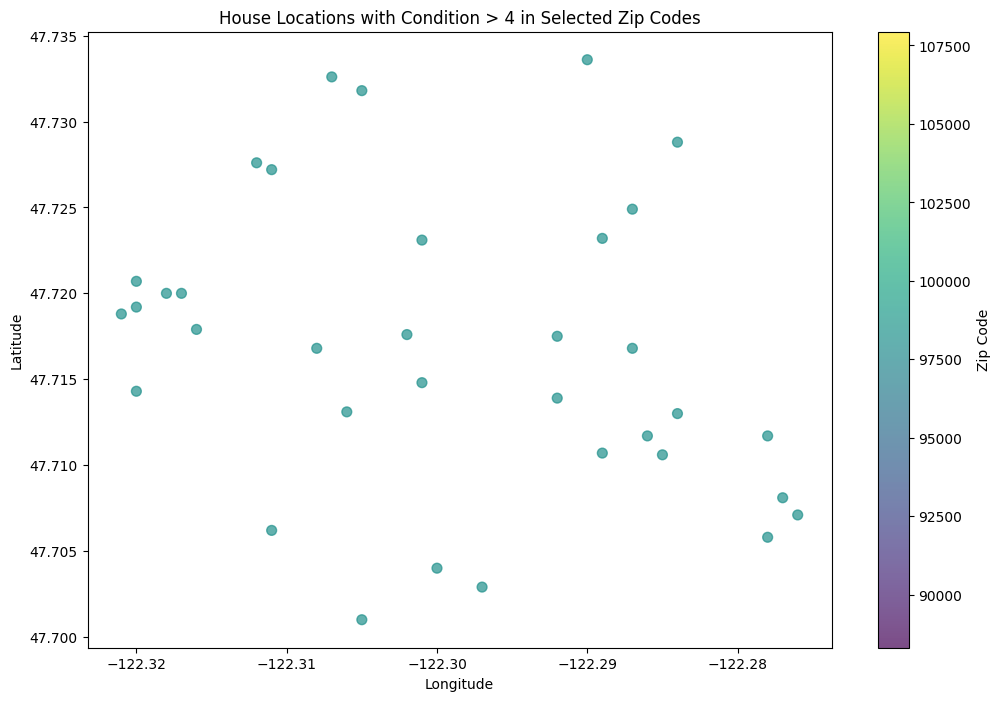

In [55]:
# Filter the DataFrame based on the condition
filtered_df = df[df['condition'] > 4]

# Select relevant columns (lat, long, zipcode)
location_zipcode_df = filtered_df[['lat', 'long', 'zipcode']]

# Drop rows with missing latitude, longitude, or zipcode values
location_zipcode_df = location_zipcode_df.dropna(subset=['lat', 'long', 'zipcode'])

# Filter DataFrame to include only specific zip codes
selected_zipcodes = [98100, 98125, 98150]
location_zipcode_df = location_zipcode_df[location_zipcode_df['zipcode'].isin(selected_zipcodes)]

# Create a scatter plot for house locations with conditions > 4 and specific zip codes
plt.figure(figsize=(12, 8))
scatter = plt.scatter(location_zipcode_df['long'], location_zipcode_df['lat'], c=location_zipcode_df['zipcode'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(scatter, label='Zip Code')
plt.title('House Locations with Condition > 4 in Selected Zip Codes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display the plot
plt.show()

In [56]:
# Filter the DataFrame to include only houses with waterfront
waterfront_df = df[df['waterfront'] == 1]

# Select relevant columns (price, condition, zipcode)
price_waterfront_df = waterfront_df[['price', 'condition', 'zipcode']]

# Drop rows with missing price, condition, or zipcode values
price_waterfront_df = price_waterfront_df.dropna(subset=['price', 'condition', 'zipcode'])

# Filter DataFrame to include only specific zip codes
selected_zipcodes = [98100, 98125, 98150]
price_waterfront_df = price_waterfront_df[price_waterfront_df['zipcode'].isin(selected_zipcodes)]

# Display the data outcome
print(price_waterfront_df)


            price  condition  zipcode
9103  1360000.000          3    98125
9243  1190000.000          4    98125
15826 1340000.000          3    98125
17753 2050000.000          4    98125
18813 1680000.000          4    98125
19606 1150000.000          3    98125


In [58]:
# Filter the DataFrame to include only houses with waterfront
waterfront_df = df[df['waterfront'] == 1]

# Select relevant columns (price, condition, zipcode, lat, long)
location_df = waterfront_df[['price', 'condition', 'zipcode', 'lat', 'long']]

# Drop rows with missing price, condition, or location values
location_df = location_df.dropna(subset=['price', 'condition', 'lat', 'long'])

# Filter DataFrame to include only specific zip codes
selected_zipcodes = [98100, 98125, 98150]
location_df = location_df[location_df['zipcode'].isin(selected_zipcodes)]

# Create a folium map centered around the first location
m = folium.Map(location=[location_df['lat'].mean(), location_df['long'].mean()], zoom_start=12)

# Add markers to the map
marker_cluster = MarkerCluster().add_to(m)
for idx, row in location_df.iterrows():
    folium.Marker([row['lat'], row['long']], popup=f"Price: {row['price']}, Condition: {row['condition']}", icon=None).add_to(marker_cluster)

# Display the map
m.save('map_with_waterfront_houses.html')


In [ ]:
# Select relevant columns (price, condition, zipcode, lat, long)
location_df = df[['price', 'condition', 'zipcode', 'lat', 'long']]

# Drop rows with missing price, condition, or location values
location_df = location_df.dropna(subset=['price', 'condition', 'lat', 'long'])

# Get all unique zip codes
all_zipcodes = location_df['zipcode'].unique()

# Create a folium map centered around the mean location of all zip codes
m = folium.Map(location=[location_df['lat'].mean(), location_df['long'].mean()], zoom_start=12)

# Add markers to the map
marker_cluster = MarkerCluster().add_to(m)
for idx, row in location_df.iterrows():
    folium.Marker([row['lat'], row['long']], popup=f"Price: {row['price']}, Condition: {row['condition']}", icon=None).add_to(marker_cluster)

# Display the map
m.save('map_with_all_zipcodes.html')


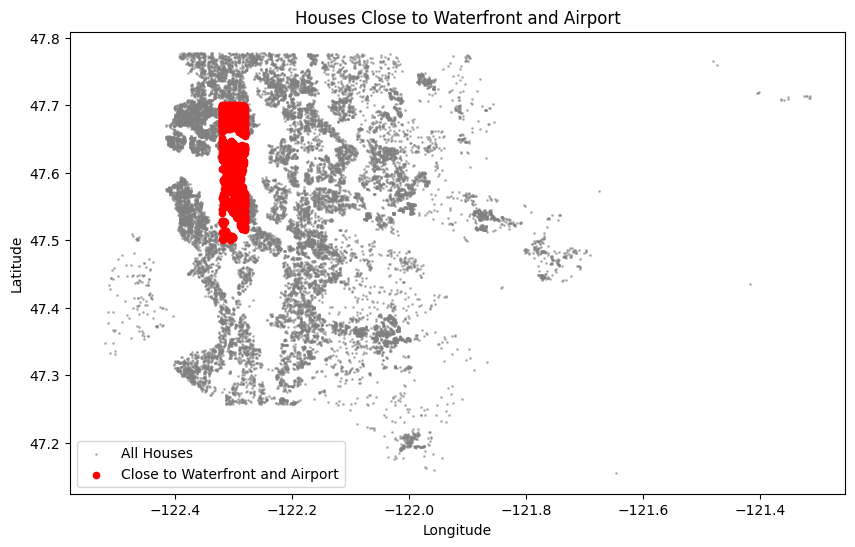

In [ ]:
# Define the latitude and longitude ranges for proximity to waterfront and airport
waterfront_range = (47.5, 47.7)  # Adjust these values based on your criteria
airport_range = (-122.32, -122.28, 47.5, 47.7)  # Adjust these values based on your criteria

# Filter houses based on proximity to waterfront and airport
waterfront_houses = df[
    (df['lat'] >= waterfront_range[0]) & (df['lat'] <= waterfront_range[1])
]
airport_waterfront_houses = waterfront_houses[
    (waterfront_houses['long'] >= airport_range[0])
    & (waterfront_houses['long'] <= airport_range[1])
    & (waterfront_houses['lat'] >= airport_range[2])
    & (waterfront_houses['lat'] <= airport_range[3])
]

# Plot the houses
plt.figure(figsize=(10, 6))

# Plot all houses
plt.scatter(df['long'], df['lat'], s=1, c='grey', alpha=0.5, label='All Houses')

# Plot houses close to waterfront and airport
plt.scatter(
    airport_waterfront_houses['long'],
    airport_waterfront_houses['lat'],
    s=20,
    c='red',
    label='Close to Waterfront and Airport'
)

# Add labels and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Houses Close to Waterfront and Airport')
plt.legend()

# Show the plot
plt.show()


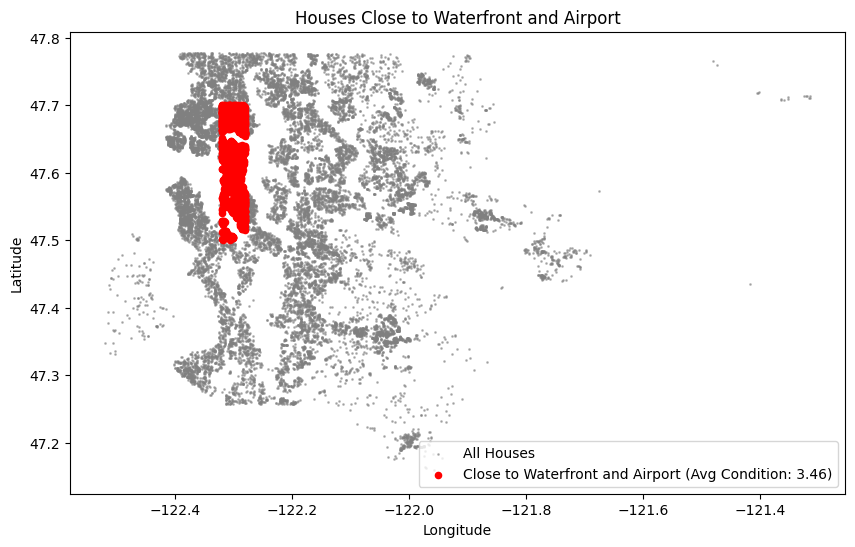

In [ ]:
# Define the latitude and longitude ranges for proximity to waterfront and airport
waterfront_range = (47.5, 47.7)  # Adjust these values based on your criteria
airport_latitude = 47.52  # Adjust based on the actual latitude of the airport
airport_longitude = -122.25  # Adjust based on the actual longitude of the airport

# Filter the dataset based on proximity to waterfront and airport
filtered_df = merged_df[
    (merged_df['lat'].between(*waterfront_range)) &
    (abs(merged_df['long'] - airport_longitude) < 0.1)  # Adjust the distance threshold as needed
]

# Plotting
plt.figure(figsize=(12, 8))
scatter = plt.scatter(filtered_df['long'], filtered_df['lat'], c=filtered_df['condition'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(scatter, label='Condition')
plt.title('Houses Close to Waterfront and Airport')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display the plot
plt.show()

# Plotting by price from cheapest to most expensive
sorted_df = filtered_df.sort_values('price')
plt.figure(figsize=(12, 8))
plt.scatter(sorted_df['long'], sorted_df['lat'], c=sorted_df['condition'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='Condition')
plt.title('Houses Close to Waterfront and Airport - Sorted by Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display the plot
plt.show()


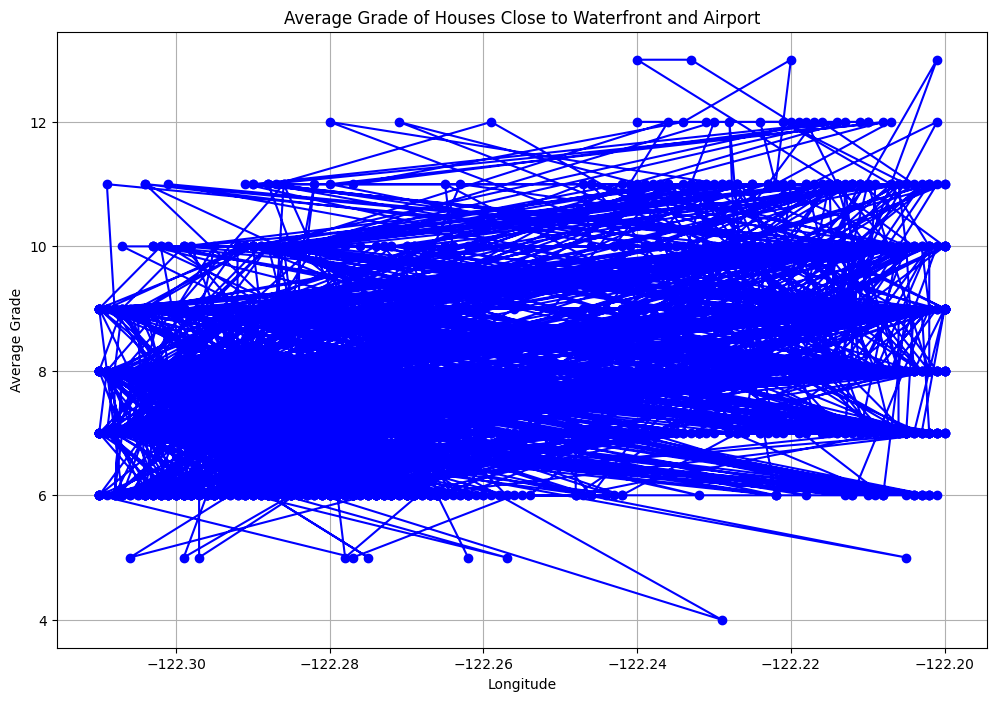

In [ ]:
# Filter the dataset to include only houses close to waterfront and an airport
waterfront_range = (47.5, 47.7)  # Adjust these values based on your criteria
airport_range = (-122.31, -122.20)  # Adjust these values based on your criteria
filtered_df = df[(df['lat'].between(*waterfront_range)) & (df['long'].between(*airport_range))]

# Sort the filtered dataset by price in ascending order (cheapest to more expensive)
sorted_df = filtered_df.sort_values(by='price')

# Plot a line graph showing average grade along with longitude
plt.figure(figsize=(12, 8))
plt.plot(sorted_df['long'], sorted_df['grade'], marker='o', linestyle='-', color='blue')
plt.title('Average Grade of Houses Close to Waterfront and Airport')
plt.xlabel('Longitude')
plt.ylabel('Average Grade')
plt.grid(True)
plt.show()


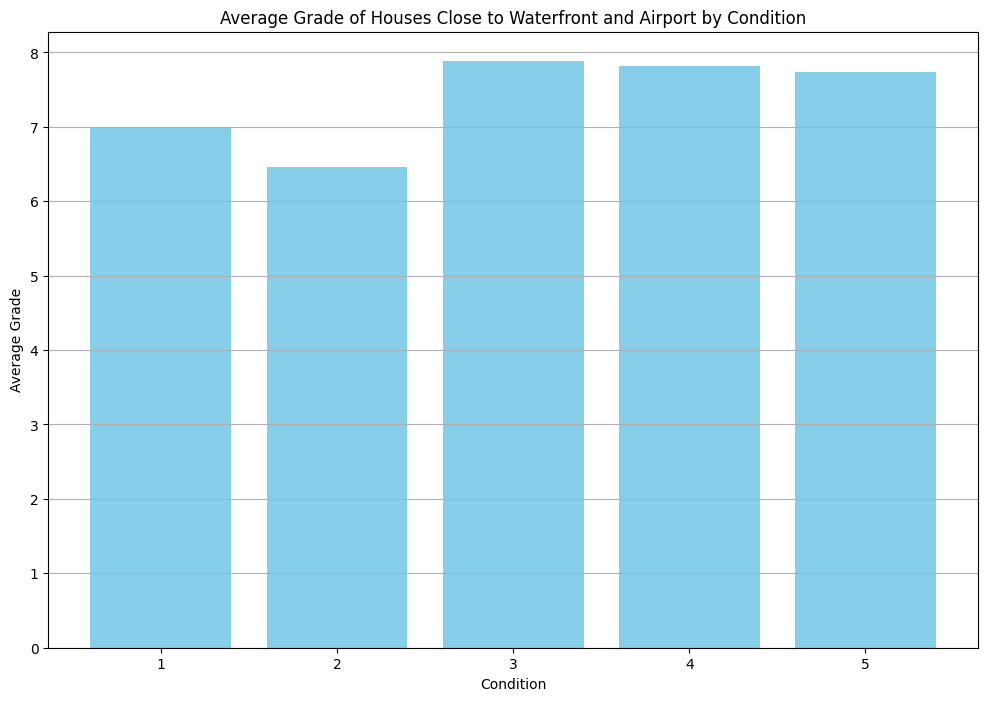

In [ ]:
# Filter the dataset to include only houses close to waterfront and an airport
waterfront_range = (47.5, 47.7)  # Adjust these values based on your criteria
airport_range = (-122.31, -122.20)  # Adjust these values based on your criteria
filtered_df = df[(df['lat'].between(*waterfront_range)) & (df['long'].between(*airport_range))]

# Calculate the average grade for each condition
average_grade_by_condition = filtered_df.groupby('condition')['grade'].mean().reset_index()

# Sort the dataframe by average grade in ascending order
sorted_df = average_grade_by_condition.sort_values(by='grade')

# Plot a bar graph showing average grade for each condition
plt.figure(figsize=(12, 8))
plt.bar(sorted_df['condition'], sorted_df['grade'], color='skyblue')
plt.title('Average Grade of Houses Close to Waterfront and Airport by Condition')
plt.xlabel('Condition')
plt.ylabel('Average Grade')
plt.grid(axis='y')
plt.show()


Top 5 Cheapest Zip Codes:
[98168, 98118, 98178, 98033, 98108]


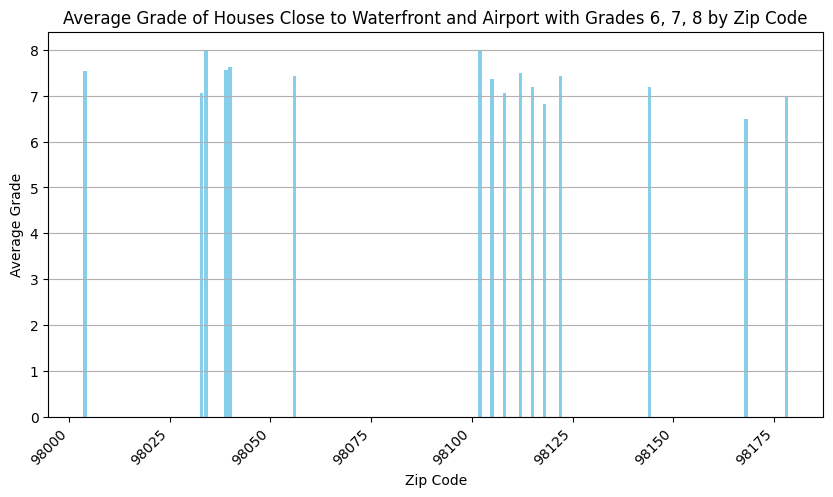

In [ ]:
# Filter the dataset to include only houses close to waterfront and an airport
waterfront_range = (47.5, 47.7)  
airport_range = (-122.31, -122.20)  
filtered_df = df[(df['lat'].between(*waterfront_range)) & (df['long'].between(*airport_range))]

# Filter houses with grades 6, 7, and 8
selected_grades = [6, 7, 8]
filtered_df = filtered_df[filtered_df['grade'].isin(selected_grades)]

# Calculate the average grade for each condition
average_grade_by_zipcode = filtered_df.groupby('zipcode')['grade'].mean().reset_index()

# Sort the dataframe by average grade in ascending order
sorted_df = average_grade_by_zipcode.sort_values(by='grade')

# Display the zip codes for the cheapest houses close to the airport and waterfront with grades 6, 7, and 8
cheapest_zipcodes = sorted_df['zipcode'].head(5).tolist()
print("Top 5 Cheapest Zip Codes:")
print(cheapest_zipcodes)

# Plot a bar graph showing average grade for each zipcode
plt.figure(figsize=(10, 5))
plt.bar(sorted_df['zipcode'], sorted_df['grade'], color='skyblue')
plt.title('Average Grade of Houses Close to Waterfront and Airport with Grades 6, 7, 8 by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Average Grade')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.show()


Top 5 Cheapest Zip Codes:
[98168, 98118, 98178, 98033, 98108]


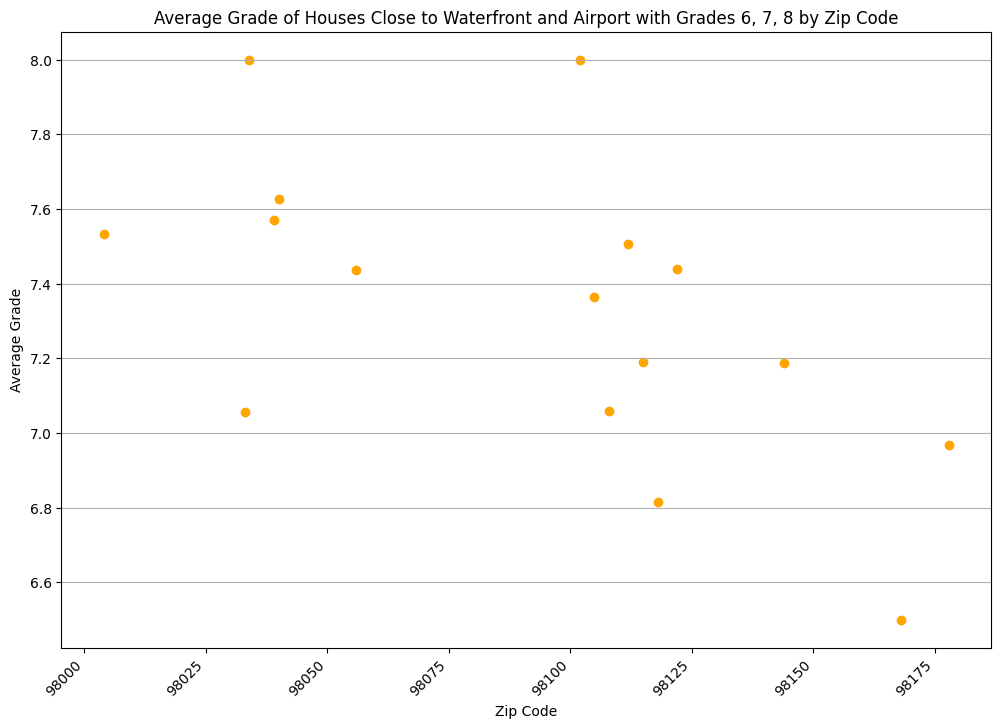

In [ ]:
# Filter the dataset to include only houses close to waterfront and an airport
waterfront_range = (47.5, 47.7)
airport_range = (-122.31, -122.20)
filtered_df = df[(df['lat'].between(*waterfront_range)) & (df['long'].between(*airport_range))]

# Filter houses with grades 6, 7, and 8
selected_grades = [6, 7, 8]
filtered_df = filtered_df[filtered_df['grade'].isin(selected_grades)]

# Calculate the average grade for each condition
average_grade_by_zipcode = filtered_df.groupby('zipcode')['grade'].mean().reset_index()

# Sort the dataframe by average grade in ascending order
sorted_df = average_grade_by_zipcode.sort_values(by='grade')

# Display the zip codes for the cheapest houses close to the airport and waterfront with grades 6, 7, and 8
cheapest_zipcodes = sorted_df['zipcode'].head(5).tolist()
print("Top 5 Cheapest Zip Codes:")
print(cheapest_zipcodes)

# Plot a scatter plot showing average grade for each zipcode
plt.figure(figsize=(12, 8))
plt.scatter(sorted_df['zipcode'], sorted_df['grade'], color='orange', marker='o')
plt.title('Average Grade of Houses Close to Waterfront and Airport with Grades 6, 7, 8 by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Average Grade')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.show()


Top 5 Most Desirable Zip Codes:
[98039, 98004, 98040, 98112, 98075]


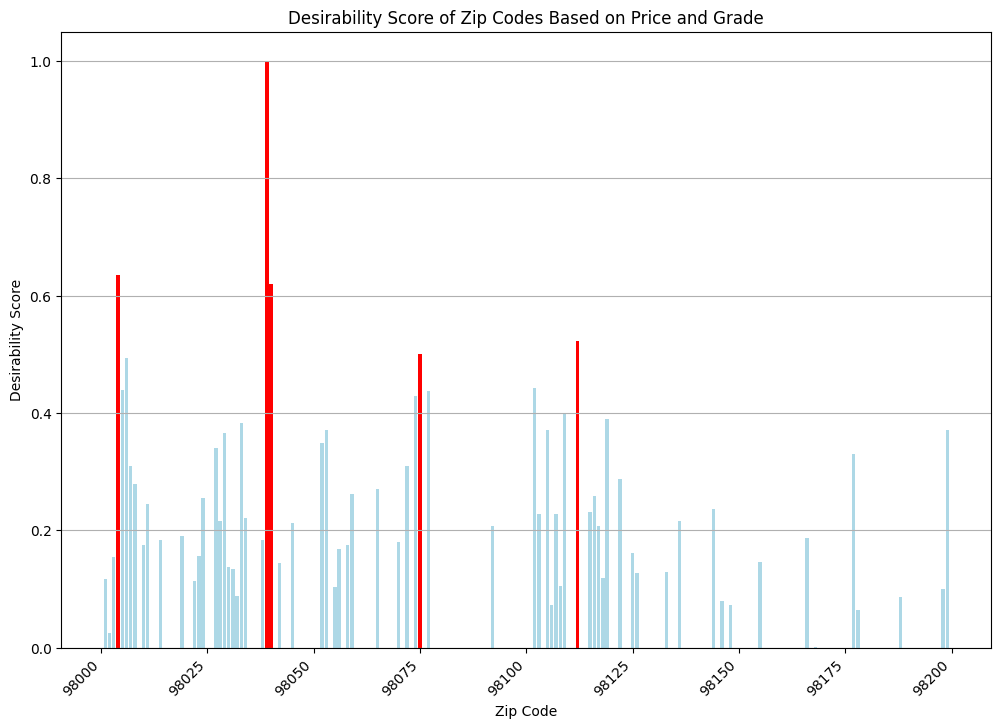

In [ ]:
# Group by zipcode and calculate average price and grade
zipcode_stats = df.groupby('zipcode').agg({'price': 'mean', 'grade': 'mean'}).reset_index()

# Normalize the price and grade to a common scale (e.g., 0 to 1) for fair comparison
zipcode_stats['normalized_price'] = (zipcode_stats['price'] - zipcode_stats['price'].min()) / (zipcode_stats['price'].max() - zipcode_stats['price'].min())
zipcode_stats['normalized_grade'] = (zipcode_stats['grade'] - zipcode_stats['grade'].min()) / (zipcode_stats['grade'].max() - zipcode_stats['grade'].min())

# Calculate a desirability score 
zipcode_stats['desirability_score'] = 0.6 * zipcode_stats['normalized_price'] + 0.4 * zipcode_stats['normalized_grade']

# Sort the dataframe by desirability score in descending order
sorted_df = zipcode_stats.sort_values(by='desirability_score', ascending=False)

# Display the top 5 most desirable zip codes
top_zipcodes = sorted_df.head(5)['zipcode'].tolist()
print("Top 5 Most Desirable Zip Codes:")
print(top_zipcodes)

# Plot a bar graph showing desirability score for each zipcode
plt.figure(figsize=(12, 8))

# Highlight the top 5 zip codes with a different color
colors = ['red' if zipcode in top_zipcodes else 'lightblue' for zipcode in sorted_df['zipcode']]
plt.bar(sorted_df['zipcode'], sorted_df['desirability_score'], color=colors)

plt.title('Desirability Score of Zip Codes Based on Price and Grade')
plt.xlabel('Zip Code')
plt.ylabel('Desirability Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.show()


In [ ]:
# Normalize features (price and grade)
df['normalized_price'] = (df['price'] - df['price'].min()) / (df['price'].max() - df['price'].min())
df['normalized_grade'] = (df['grade'] - df['grade'].min()) / (df['grade'].max() - df['grade'].min())

# Calculate desirability score with a 60-40 weight distribution
df['desirability_score'] = 0.6 * df['normalized_price'] + 0.4 * df['normalized_grade']

# Sort DataFrame by desirability score if needed
sorted_df = df.sort_values(by='desirability_score', ascending=False)

# Display the DataFrame with the new 'desirability_score' column
print(sorted_df[['price', 'grade', 'normalized_price', 'normalized_grade', 'desirability_score']])


            price  grade  normalized_price  normalized_grade  \
7245  7700000.000     13             1.000             1.000   
9245  6890000.000     13             0.894             1.000   
3910  7060000.000     11             0.916             0.800   
4407  5570000.000     13             0.721             1.000   
1446  5350000.000     12             0.692             0.900   
...           ...    ...               ...               ...   
16326  100000.000      4             0.003             0.100   
14567   95000.000      4             0.002             0.100   
16516   90000.000      4             0.002             0.100   
465     80000.000      4             0.000             0.100   
3220   262000.000      3             0.024             0.000   

       desirability_score  
7245                1.000  
9245                0.936  
3910                0.870  
4407                0.832  
1446                0.775  
...                   ...  
16326               0.042  
14567  

In [ ]:

# Filter the top 5 most desirable zip codes
top_zipcodes = [98112, 98105, 98109, 98102, 98119]  # Update with your actual top zip codes

filtered_df = df[df['zipcode'].isin(top_zipcodes)]

# Define latitude and longitude ranges for proximity to the airport
airport_range = (-122.31, -122.20)  # Adjust based on your criteria

# Filter houses close to the airport
houses_near_airport = filtered_df[(filtered_df['lat'].between(47.5, 47.7)) & (filtered_df['long'].between(*airport_range))]

# Display the houses that are close to the airport in the most desirable zip codes
print(houses_near_airport[['id', 'zipcode', 'lat', 'long']])


               id  zipcode    lat     long
54     4217401195    98105 47.657 -122.281
55     9822700295    98105 47.660 -122.290
211    1025049114    98105 47.665 -122.284
260    8722101360    98112 47.636 -122.302
305    5016001535    98112 47.624 -122.298
...           ...      ...    ...      ...
21082  1806900502    98112 47.620 -122.309
21224  7174800094    98105 47.665 -122.305
21288  4385700185    98112 47.637 -122.279
21300  6600000050    98112 47.622 -122.290
21536   688000017    98112 47.623 -122.307

[403 rows x 4 columns]


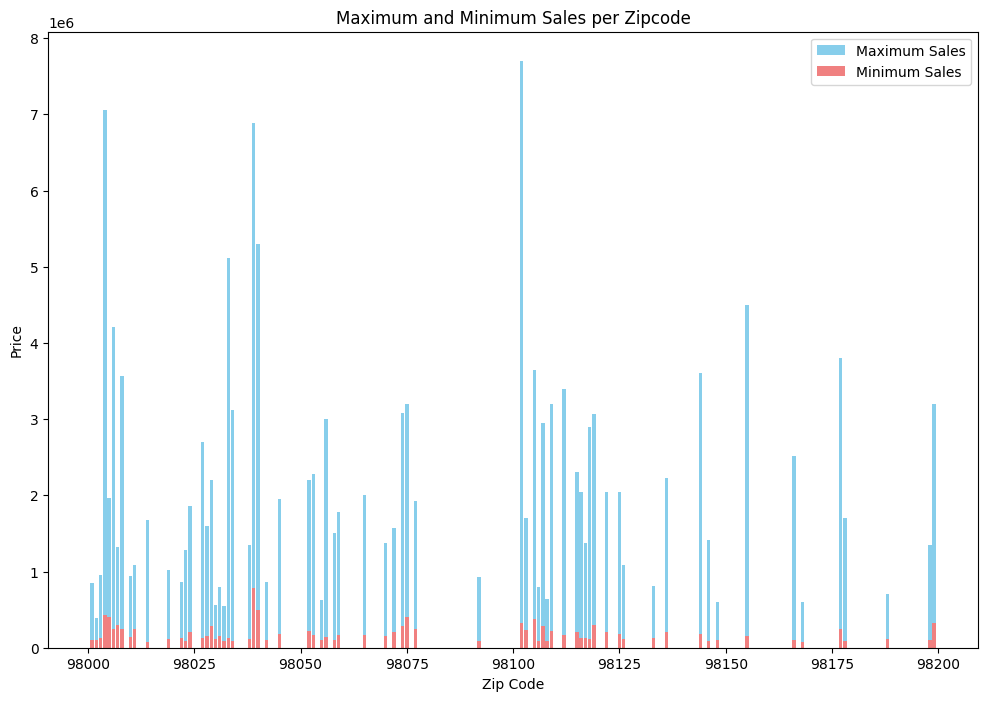

In [65]:
# Group by zipcode and calculate maximum and minimum sales
zipcode_sales = df.groupby('zipcode')['price'].agg(['max', 'min']).reset_index()

# Bar plot
plt.figure(figsize=(12, 8))
plt.bar(zipcode_sales['zipcode'], zipcode_sales['max'], color='skyblue', label='Maximum Sales')
plt.bar(zipcode_sales['zipcode'], zipcode_sales['min'], color='lightcoral', label='Minimum Sales')
plt.title('Maximum and Minimum Sales per Zipcode')
plt.xlabel('Zip Code')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
# Define latitude and longitude ranges for waterfront and airport areas
waterfront_latitude_range = (47.5, 47.7)  # Adjust as needed
airport_longitude_range = (-122.31, -122.20)  # Adjust as needed

# Filter the dataset based on latitude and longitude
df_filtered = df[(df['lat'].between(*waterfront_latitude_range)) & (df['long'].between(*airport_longitude_range))]

# Display the filtered DataFrame
print(df_filtered)


               id       date       price  bedrooms  bathrooms  sqft_living  \
0      7129300520 2014-10-13  221900.000         3      1.000         1180   
11     9212900260 2014-05-27  468000.000         2      1.000         1160   
21     2524049179 2014-08-26 2000000.000         3      2.750         3050   
28     5101402488 2014-06-24  438000.000         3      1.750         1520   
35     9547205180 2014-06-13  696000.000         3      2.500         2300   
...           ...        ...         ...       ...        ...          ...   
21581   191100405 2015-04-21 1580000.000         4      3.250         3410   
21584   249000205 2014-10-15 1540000.000         5      3.750         4470   
21588  9834201367 2015-01-26  429000.000         3      2.000         1490   
21594  1523300141 2014-06-23  402101.000         2      0.750         1020   
21596  1523300157 2014-10-15  325000.000         2      0.750         1020   

       sqft_lot  floors  waterfront  view  ...             map_

In [ ]:
# Sort the filtered DataFrame by price in ascending order
cheapest_houses = df_filtered.sort_values(by='price')

# Display the top cheapest houses
print(cheapest_houses)


               id       date       price  bedrooms  bathrooms  sqft_living  \
10413  7129800036 2015-01-14  109000.000         2      0.500          580   
15796  7129304540 2014-12-20  133000.000         5      2.000         1430   
19039  3352400661 2014-11-10  135900.000         2      1.000          760   
10947  9368700270 2015-04-01  137900.000         3      1.750         1160   
8454   4006000401 2014-08-11  140000.000         2      1.000          900   
...           ...        ...         ...       ...        ...          ...   
1313   7558700030 2015-04-13 5300000.000         6      6.000         7390   
1446   8907500070 2015-04-13 5350000.000         5      5.000         8000   
4407   2470100110 2014-08-04 5570000.000         5      5.750         9200   
9245   9208900037 2014-09-19 6890000.000         6      7.750         9890   
3910   9808700762 2014-06-11 7060000.000         5      4.500        10040   

       sqft_lot  floors  waterfront  view  ...             map_

In [ ]:
# Define the latitude and longitude ranges for proximity to waterfront and airport
waterfront_range = (47.5, 47.7)  # Adjust these values based on your criteria
airport_range = (-122.31, -122.20)  # Adjust these values based on your criteria


# Filter the dataset to include only houses close to waterfront and an airport
filtered_df = df[(df['lat'].between(*waterfront_range)) & (df['long'].between(*airport_range))]


# Create a folium map centered around the mean latitude and longitude
map_center = [filtered_df['lat'].mean(), filtered_df['long'].mean()]
my_map = folium.Map(location=map_center, zoom_start=12)




# Add markers for each house
for index, row in filtered_df.iterrows():
   folium.Marker([row['lat'], row['long']], popup=row['id']).add_to(my_map)


# Save the map as an HTML file
my_map.save('houses_near_airport_waterfront_map.html')

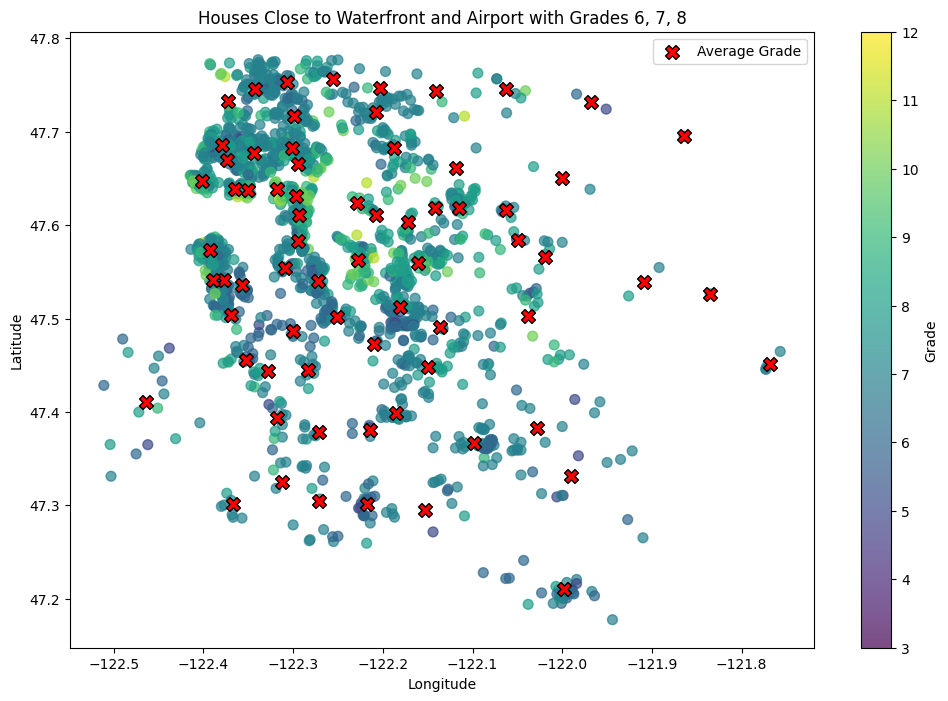

In [ ]:
# Average location by zipcode
average_location_by_zipcode = filtered_df.groupby('zipcode')[['lat', 'long', 'grade']].mean().reset_index()

# Scatter plot for individual houses
plt.figure(figsize=(12, 8))
scatter = plt.scatter(filtered_df['long'], filtered_df['lat'], c=filtered_df['grade'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(scatter, label='Grade')

# Average grade markers
plt.scatter(average_location_by_zipcode['long'], average_location_by_zipcode['lat'], c='red', s=100, edgecolors='black', linewidth=1, marker='X', label='Average Grade')

plt.title('Houses Close to Waterfront and Airport with Grades 6, 7, 8')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


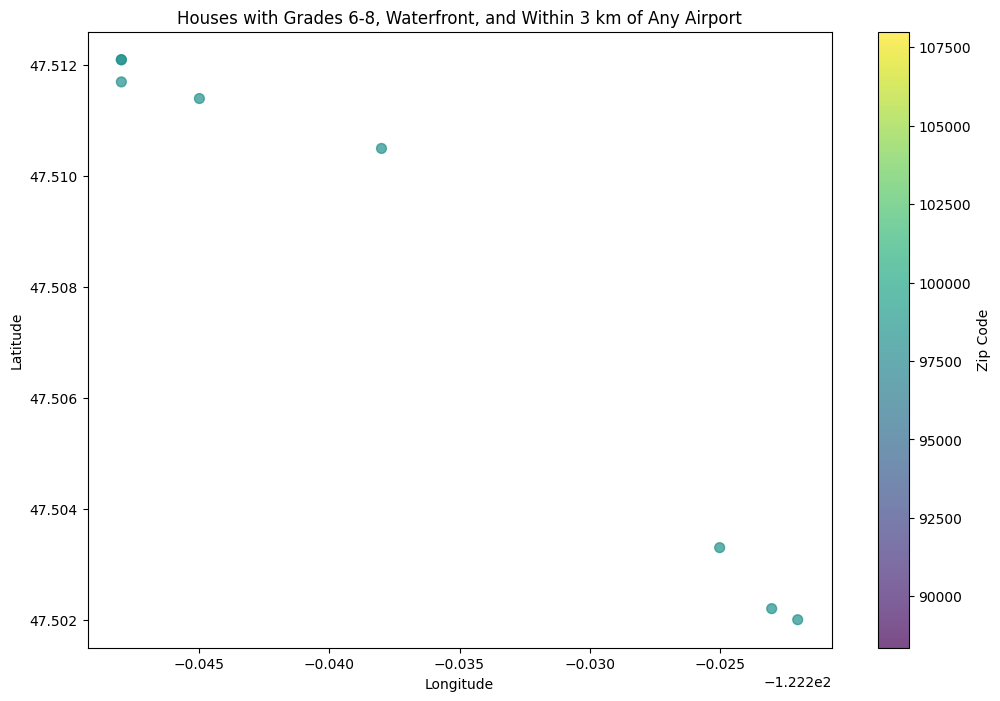

In [59]:
# Provided airport coordinates
airports = {
    'RMA': (47.49573695291879, -122.21797540953877),
    'KCH': (47.520983034945, -122.29850128864334),
    'BFI': (47.53199570159451, -122.29476380058364),
    'KCI': (47.537612202610134, -122.30379403684303)
}

# Function to calculate distance between a house and all airports
def calculate_distance(row):
    house_location = (row['lat'], row['long'])
    distances = {code: geodesic(house_location, coord).kilometers for code, coord in airports.items()}
    return min(distances.values())

# Add a new column 'distance_to_airport' to the DataFrame
df['distance_to_airport'] = df.apply(calculate_distance, axis=1)

# Filter houses with grades between 6 and 8, waterfront, and within 3 km of any airport
filtered_df = df[(df['grade'].between(6, 8)) & (df['waterfront'] == 1) & (df['distance_to_airport'] <= 3)]

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(filtered_df['long'], filtered_df['lat'], c=filtered_df['zipcode'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='Zip Code')
plt.title('Houses with Grades 6-8, Waterfront, and Within 3 km of Any Airport')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


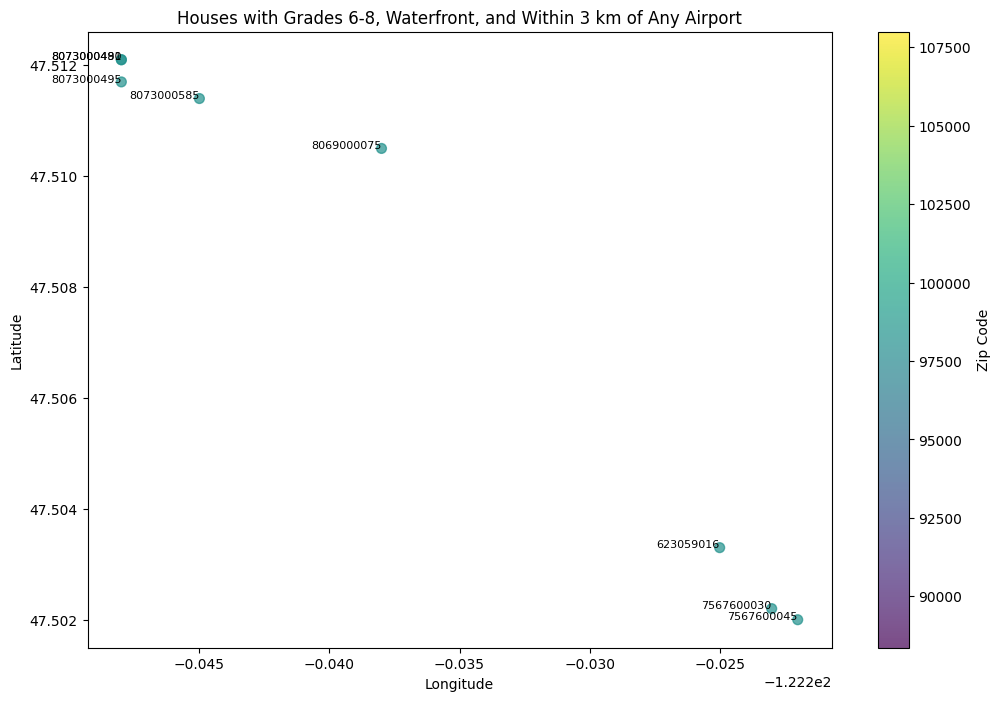

In [64]:
# Provided airport coordinates
airports = {
    'RMA': (47.49573695291879, -122.21797540953877),
    'KCH': (47.520983034945, -122.29850128864334),
    'BFI': (47.53199570159451, -122.29476380058364),
    'KCI': (47.537612202610134, -122.30379403684303)}

# Function to calculate distance between a house and all airports
def calculate_distance(row):
    house_location = (row['lat'], row['long'])
    distances = {code: geodesic(house_location, coord).kilometers for code, coord in airports.items()}
    return min(distances.values())

# Add a new column 'distance_to_airport' to the DataFrame
df['distance_to_airport'] = df.apply(calculate_distance, axis=1)

# Filter houses with grades between 6 and 8, waterfront, and within 3 km of any airport
filtered_df = df[(df['grade'].between(6, 8)) & (df['waterfront'] == 1) & (df['distance_to_airport'] <= 3)]

# Plotting
plt.figure(figsize=(12, 8))
scatter = plt.scatter(filtered_df['long'], filtered_df['lat'], c=filtered_df['zipcode'], cmap='viridis', s=50, alpha=0.7)

# Add house ID as text to each point
for i, txt in enumerate(filtered_df['id']):
    plt.text(filtered_df['long'].iloc[i], filtered_df['lat'].iloc[i], str(txt), fontsize=8, ha='right')

plt.colorbar(scatter, label='Zip Code')
plt.title('Houses with Grades 6-8, Waterfront, and Within 3 km of Any Airport')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [63]:
# Provided airport coordinates
airports = {
    'RMA': (47.49573695291879, -122.21797540953877),
    'KCH': (47.520983034945, -122.29850128864334),
    'BFI': (47.53199570159451, -122.29476380058364),
    'KCI': (47.537612202610134, -122.30379403684303)
}

# Function to calculate distance between a house and all airports
def calculate_distance(row):
    house_location = (row['lat'], row['long'])
    distances = {code: geodesic(house_location, coord).kilometers for code, coord in airports.items()}
    return min(distances.values())

# Add a new column 'distance_to_airport' to the DataFrame
df['distance_to_airport'] = df.apply(calculate_distance, axis=1)

# Filter houses with grades between 6 and 8, waterfront, and within 3 km of any airport
filtered_df = df[(df['grade'].between(6, 8)) & (df['waterfront'] == 1) & (df['distance_to_airport'] <= 3)]

# Create a folium map centered around Seattle
map_center = [47.6062, -122.3321]
folium_map = folium.Map(location=map_center, zoom_start=12)

# Add markers for each house with color representing the zipcode and include house ID in the popup
for index, row in filtered_df.iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=f"House ID: {row['id']}\nZipcode: {row['zipcode']}",
        icon=folium.Icon(color='orange')
    ).add_to(folium_map)

# Save the map as an HTML file
folium_map.save('map_best.html')


In [60]:
# Provided airport coordinates
airports = {
    'RMA': (47.49573695291879, -122.21797540953877),
    'KCH': (47.520983034945, -122.29850128864334),
    'BFI': (47.53199570159451, -122.29476380058364),
    'KCI': (47.537612202610134, -122.30379403684303)
}

# Function to calculate distance between a house and all airports
def calculate_distance(row):
    house_location = (row['lat'], row['long'])
    distances = {code: geodesic(house_location, coord).kilometers for code, coord in airports.items()}
    return min(distances.values())

# Add a new column 'distance_to_airport' to the DataFrame
df['distance_to_airport'] = df.apply(calculate_distance, axis=1)

# Filter houses with grades between 6 and 8, waterfront, and within 3 km of any airport
filtered_df = df[(df['grade'].between(6, 8)) & (df['waterfront'] == 1) & (df['distance_to_airport'] <= 3)]

# Create a folium map centered around Seattle
map_center = [47.6062, -122.3321]
folium_map = folium.Map(location=map_center, zoom_start=12)

# Add markers for each house with color representing the zip code
for index, row in filtered_df.iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=f"Zipcode: {row['zipcode']}\nGrade: {row['grade']}\nDistance to Airport: {row['distance_to_airport']:.2f} km",
        icon=folium.Icon(color='blue')
    ).add_to(folium_map)

# Save the map as an HTML file
folium_map.save('map_with_markers.html')


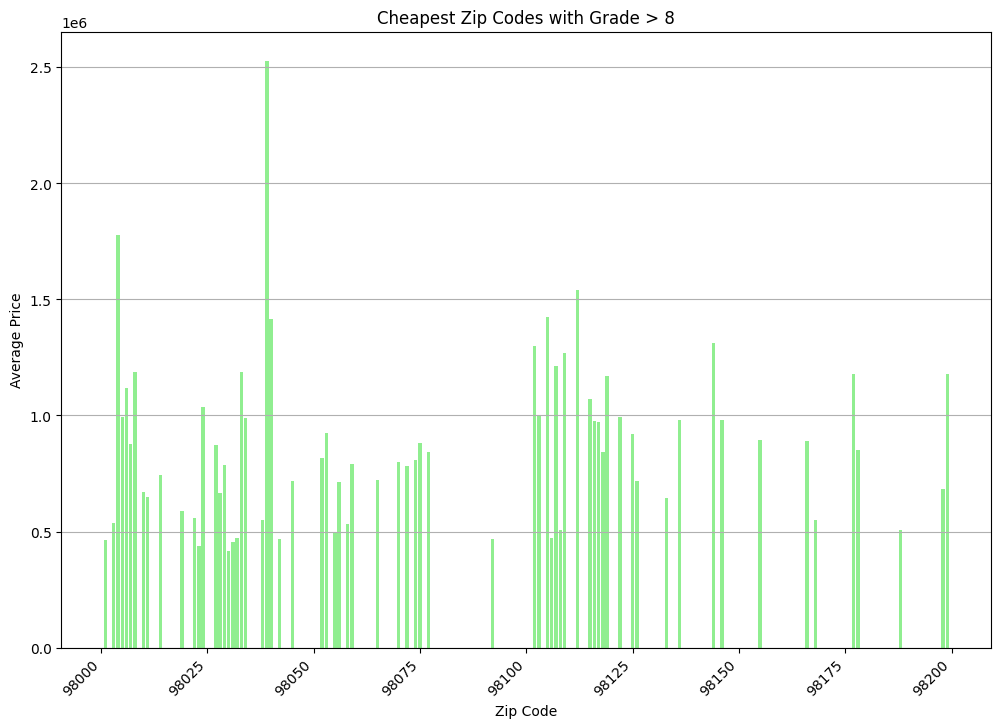

In [66]:
# Filter houses with grade higher than 8
high_grade_df = df[df['grade'] > 8]

# Group by zipcode and calculate average price
average_price_by_zipcode = high_grade_df.groupby('zipcode')['price'].mean().reset_index()

# Sort the dataframe by average price in ascending order
sorted_df = average_price_by_zipcode.sort_values(by='price')

# Bar plot
plt.figure(figsize=(12, 8))
plt.bar(sorted_df['zipcode'], sorted_df['price'], color='lightgreen')
plt.title('Cheapest Zip Codes with Grade > 8')
plt.xlabel('Zip Code')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.show()


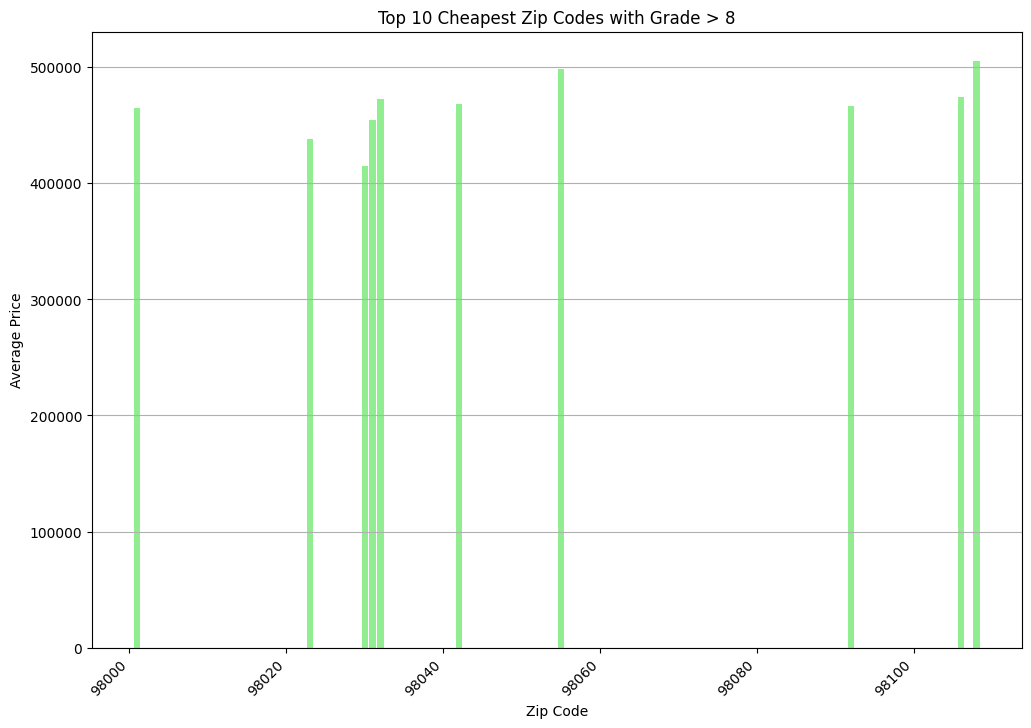

In [67]:
# Filter houses with grade higher than 8
high_grade_df = df[df['grade'] > 8]

# Group by zipcode and calculate average price
average_price_by_zipcode = high_grade_df.groupby('zipcode')['price'].mean().reset_index()

# Sort the dataframe by average price in ascending order
sorted_df = average_price_by_zipcode.sort_values(by='price').head(10)  # Select top 10

# Bar plot
plt.figure(figsize=(12, 8))
plt.bar(sorted_df['zipcode'], sorted_df['price'], color='lightgreen')
plt.title('Top 10 Cheapest Zip Codes with Grade > 8')
plt.xlabel('Zip Code')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.show()


In [69]:
# Filter houses with a grade higher than 8
filtered_df = df[df['grade'] > 8]

# Group by zipcode and calculate the mean 
average_price_by_zipcode = filtered_df.groupby('zipcode')['price'].mean().reset_index()

# Sort the DataFrame by price in ascending order to get the cheapest zip codes
sorted_df = average_price_by_zipcode.sort_values(by='price').head(10)

# Display the result
print("Top 10 Cheapest Zip Codes with Grade > 8:")
print(sorted_df[['zipcode', 'price']])


Top 10 Cheapest Zip Codes with Grade > 8:
    zipcode      price
17    98030 414872.233
12    98023 438224.431
18    98031 454263.333
0     98001 465186.750
39    98092 466184.037
25    98042 468523.831
19    98032 472500.000
43    98106 473854.545
29    98055 498737.500
45    98108 505326.857
